<a href="https://colab.research.google.com/github/capodic/Project_work_HAR/blob/main/Project_Work_HAR_Classification_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center><font size=6 color="blue">**Analisi di dataset e sviluppo modello di Machine Learning per riconoscimento e classificazione Attività Umane (HAR Human Activity Recognition)**</font></center>

## <font size=5 color="blue">**Descrizione del progetto**</font>

Si vuole realizzare l'analisi di dataset relativi a collezioni di dati da sensori inerziali (IMU) 9 assi (3 assi per accelerometro, magnetomero e giroscopio) posti solidali con i soggetti di cui di vuole rilevare l'attività motoria e classificarne il tipo di attività **(HAR Human Activity Recognition)** in base ad un modello di machine learning da sviluppare.

> I dati sono rilevati tramite un sensore commerciale MBIENTLAB della serie  Metawear tipo MetaMotionR (https://mbientlab.com/metamotionr/) anche se sono disponibili diversi dataset e studi di questo tipo di problema a partire da dati raccolti dai sensori dei comuni smartphone (vedi  [riferimenti](#riferimenti)).
<center>
<div class="logo">
<img width="50%" src='https://mbientlab.com/wp-content/uploads/2018/12/metamotion-2.png' alt="MetaWear R5"/>
</div>

**Fig-1: MBIENTLAB MetaMotion R5**</center>

>NB: Per brevità di esposizione prendiamo in considerazione solo i dati dell'accelerometro che forniscono i dati di accelerazione lungo 3 assi e quindi x,y,z, normali tra loro di cui 1 sempre e' orientato verso il basso (verrà giustificata la scelta dall'analisi esplorativa dei dati)

Verrà svolta la **data exploration** (come passo iniziale della **data analysis**) per cercare innanzitutto di comprendere la natura e le relazioni tra i dati; vedremo:
- in quale formato sono (se **tidy** o meno)
- se tutti i valori sono validi (in caso contrario effettueremo il **cleansing** (o **scrubbing)** dei dati
-  visualizzazione dei dati quali andamento nel tempo ed in frequenza, distribuzione dei valori dei campioni
- analisi di possibili relazioni (correlazioni) e dipendenza nei dati stessi e importanza delle singole fetatures (p.e. tramite correlazione e la **variable importance analysis**).

Al termine varrà effettuala la **data visualization** ovvero verranno presentati i grafici per le conlcusioni finali dell'analisi evidenziando in modo visuale le caratteristiche salienti dei dati analizzati.

L'analisi sarà svolta in ambiente **Jupyter-lab** su pc locale, ma il notebook sarà testato anche in **Google Colab** per una successiva possibile condivisione, potendo questo caricare e salvare notebook direttamente dai repository pubblici di  [github](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

### Riferimenti  

<a name="riferimenti"></a>

1. Machine Learning Methods for Classifying Human Physical Activity from On-Body Accelerometers [https://www.mdpi.com/1424-8220/10/2/1154/pdf]
2. A Machine Learning Platform in Healthcare with Actor Model Approach [https://link.springer.com/chapter/10.1007/978-3-030-52246-9_41]
3. A Public Domain Dataset for Human Activity Recognition Using Smartphones, 2013. [https://upcommons.upc.edu/handle/2117/20897]
4. Human Activity Recognition on Smartphones Using a Multiclass Hardware-Friendly Support Vector Machine [https://link.springer.com/chapter/10.1007/978-3-642-35395-6_30]
5. UCI HAR Dataset [https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip]


## <font size=5 color="blue">**Fase 1 : Data exploration**</font>

### Attivazione di Google drive per il caricamento dei files (<font color="red"> da eseguire solo in ambiente **GOOGLE COLAB** </font> ) e delle sessioni salvate 

In [ ]:
!pip install dill
import os
import dill
from google.colab import drive

backup_dir = '/content/drive/MyDrive/Colab Notebooks/colab_sessions'
backup_file = 'notebook_env_no_scale.db'
backup_path = backup_dir + '/' + backup_file

def init_drive():
  # create directory if not exist
  # drive.mount('/content/drive')
  if not os.path.exists(backup_dir):
    drive.mount('/content/drive')
  if not os.path.exists(backup_dir):
    !mkdir backup_dir

def restart_kernel():
  os._exit(00)

def save_session():
  init_drive()
  dill.dump_session(backup_path, byref=True)
  # ignore=True, byref=True necessari per errore Can't pickle <class 'matplotlib.axes._subplots.AxesSubplot'>: it's not found as matplotlib.axes._subplots.AxesSubplot

def load_session():
  init_drive()
  dill.load_session(backup_path)
print('Funzioni di salvataggio/ripristino sessione caricate')


Funzioni di salvataggio/ripristino sessione caricate


In [ ]:
# load_session() # togliere commento per ripristinare sessione

In [ ]:
# save_session() # togliere commento per salvare sessione

### <font color="red">✪</font> Importazione librerie 
> **Pandas** per la gestione dei dataframe  
> **Numpy** per la gestione efficente di array e funzioni relative  
> **Matplotlib** per la visualizzazione di grafici (libreria a basso livello)  
>  **Seaborn** per la visualizzazione di grafici (libreria ad alto livello che si apploggia a Matplotlib)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
print('lib caricate')

lib caricate


### Funzioni di utilità (widget interattivo, gestore eccezioni, playsound)

In [ ]:
def pippo(x =10, y=10):
    for i in range(5):
      print(x+y*i)
      
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML
w = interactive(pippo, x=5, y=5)
display(w) 

/usr/local/lib/python3.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), IntSlider(value=5, description='y',…

In [ ]:
# https://stackoverflow.com/questions/61176900/jupyter-colab-play-sound-with-any-error-in-any-cell-play-sound-after-compl
# This line is specific for Colab  (please provide alternative for Jupyter)
from google.colab import output
def beep_completed():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

# Just play it with
beep_completed()


### Verifica del formato dei dati, del nome delle colonne e dei contenuti di un file di dati 
> - **epoch** rappresenta un timestamp  
> - **time** l'ora di campionamento
> - **elapsed** il tempo trascorso tra un campione ed in successivo  
> - **x-axis (g)**, **y-axis (g)**, **z-axis (g)** sono le accerazioni espresse come frazione di g (acc. gravitazionale) lungo i tre assi normali, rilevate avendo posizionato il sensore in un certo modo **convenzionale** per garantire la ripetitività degli esperimenti

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cammina-Accelerometer.csv')
df.head()

,epoch (ms),time (01:00),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1590567884800,2020-05-27T10:24:44.800,0.000,-0.842,-0.059,0.563
1,1590567884805,2020-05-27T10:24:44.805,0.005,-0.847,-0.061,0.567
2,1590567884810,2020-05-27T10:24:44.810,0.010,-0.847,-0.063,0.564
3,1590567884815,2020-05-27T10:24:44.815,0.015,-0.844,-0.068,0.562
4,1590567884820,2020-05-27T10:24:44.820,0.020,-0.847,-0.067,0.562


### <font color="red">✪</font> Caricamento dei dati da file CSV e selezione delle features di interesse
> Vengono importate solo le colonne 3,4,5 relative alle accelerazioni lungo gli assi x, y, z e viene aggiunta la colonna delle **label** non contenuta originariamente nei dati  
> NB: le righe sono già ordinate temporalmente

In [3]:
#definizione di valori per le label delle attività che si deducono dal nome del file di dati e non dati dati stessi 
SEDUTO=0; INPIEDI=1; SDRAIATO=2; CAMMINA=3; SCENDE=4; SALE=5;
pathdir_read = '/content/drive/MyDrive/Colab Notebooks/data/'
df_labels = [SEDUTO, INPIEDI, SDRAIATO, CAMMINA, SCENDE, SALE]

# prendo colonne di interesse, con header sulla prima riga (0)
sed = pd.read_csv(pathdir_read+"seduto-Accelerometer.csv", header = 0, usecols=[3,4,5])  
sed ['label']= SEDUTO

inp = pd.read_csv(pathdir_read+"inpiedi-Accelerometer.csv", header = 0, usecols=[3,4,5])
inp ['label']= INPIEDI 

sdr = pd.read_csv(pathdir_read+"sdraiato-Accelerometer.csv", header = 0, usecols=[3,4,5])
sdr ['label']= SDRAIATO 

cam = pd.read_csv(pathdir_read+"cammina-Accelerometer.csv", header = 0, usecols=[3,4,5])
cam ['label']= CAMMINA 

sce = pd.read_csv(pathdir_read+"scende-Accelerometer.csv", header = 0, usecols=[3,4,5])
sce ['label']= SCENDE 

sal = pd.read_csv(pathdir_read+"sali-Accelerometer.csv", header = 0, usecols=[3,4,5])
sal ['label']= SALE 

print("Dati dei singoli file CSV caricati")

# definizioni var da usare nel lavoro

#lista dei singoli df
df_list = [sed, inp, sdr, cam, sce, sal]
# df che contiene tutti i dati
df = pd.concat([sed, inp, sdr,cam,sce,sal], ignore_index=True)
# df che contiene le solo colonne delle features
df_features = df.iloc[:,:-1]
#ds che contiene la serie delle label
ds_labels = df.iloc[:,-1]
label_txt = ['Seduto','In Piedi','Sdraito','Cammina','Scende','Sale'] # label_text[SEDUTO] => restituisce 'Seduto'

df


Dati dei singoli file CSV caricati


,x-axis (g),y-axis (g),z-axis (g),label
0,-0.818,-0.156,0.572,0
1,-0.826,-0.158,0.577,0
2,-0.824,-0.159,0.576,0
3,-0.825,-0.160,0.570,0
4,-0.823,-0.157,0.573,0
...,...,...,...,...
88075,-0.885,-0.169,0.417,5
88076,-0.893,-0.178,0.412,5
88077,-0.899,-0.179,0.405,5
88078,-0.898,-0.173,0.396,5


###Visualizzazione sommaria dei dati

> **Pretty printing**  
>
> - Esiste in colab la possibilità di visualizzazione iterattiva delle tabelle mediante la lib **data_table** ( per dettagli https://colab.research.google.com/notebooks/data_table.ipynb )  
> - Inoltre Pandas ha una funzione built-in **to_html()** per formattare in l'output con un'estetica più gradevole e funzionale 

In [ ]:
# esempio utilizzo datatable
from google.colab import data_table
data_table.DataTable(sed, include_index=False, num_rows_per_page=10)

Differenti modi di visualizzare l'output tabellare

In [15]:
print(sed.describe().to_markdown())
print("\ndescribe(): \n", sed.describe())
print("\nhead(): \n", sed.head())
print("\ninfo():"); print( sed.info());

|       |     x-axis (g) |    y-axis (g) |    z-axis (g) |   label |
|:------|---------------:|--------------:|--------------:|--------:|
| count | 13684          | 13684         | 13684         |   13684 |
| mean  |    -0.82462    |    -0.172714  |     0.569474  |       0 |
| std   |     0.00757253 |     0.0157371 |     0.0110142 |       0 |
| min   |    -0.944      |    -0.265     |     0.466     |       0 |
| 25%   |    -0.829      |    -0.187     |     0.564     |       0 |
| 50%   |    -0.825      |    -0.168     |     0.572     |       0 |
| 75%   |    -0.821      |    -0.16      |     0.576     |       0 |
| max   |    -0.726      |    -0.112     |     0.608     |       0 |

describe(): 
          x-axis (g)    y-axis (g)    z-axis (g)    label
count  13684.000000  13684.000000  13684.000000  13684.0
mean      -0.824620     -0.172714      0.569474      0.0
std        0.007573      0.015737      0.011014      0.0
min       -0.944000     -0.265000      0.466000      0.0
25%       

Utilizzo della libreria **IPython.display** per utilizzare la **to_html()** di Pandas per viusalizzare i dataframe

In [ ]:
# l'utlimo tipo di output si puo' ottenere da:
from IPython.display import display, HTML

display(HTML(sed.describe().to_html()))

,x-axis (g),y-axis (g),z-axis (g),label
count,13684.000000,13684.000000,13684.000000,13684.0
mean,-0.824620,-0.172714,0.569474,0.0
std,0.007573,0.015737,0.011014,0.0
min,-0.944000,-0.265000,0.466000,0.0
25%,-0.829000,-0.187000,0.564000,0.0
50%,-0.825000,-0.168000,0.572000,0.0
75%,-0.821000,-0.160000,0.576000,0.0
max,-0.726000,-0.112000,0.608000,0.0


In [ ]:
# la lunghezza del dataframe puo' essere visualizzato con shape oppure semplicemente il num di righe con len(df.index)
print(sed.shape)
print(len(sed.index))


Vediamo in dettaglio le prime righe dei dataframe caricati...
Si poteva usare passare alla head un parametro (n) per visualizzare le prime n righe p.e. print(sed.head(10)) per stampare le prime 10 righe

In [ ]:
print(sed.head())
print(inp.head())
print(sdr.head())
print(cam.head())
print(sce.head())
print(sal.head())


   x-axis (g)  y-axis (g)  z-axis (g)  label
0      -0.818      -0.156       0.572      0
1      -0.826      -0.158       0.577      0
2      -0.824      -0.159       0.576      0
3      -0.825      -0.160       0.570      0
4      -0.823      -0.157       0.573      0
   x-axis (g)  y-axis (g)  z-axis (g)  label
0      -0.932      -0.163       0.345      1
1      -0.939      -0.167       0.352      1
2      -0.938      -0.168       0.349      1
3      -0.942      -0.167       0.350      1
4      -0.943      -0.164       0.344      1
   x-axis (g)  y-axis (g)  z-axis (g)  label
0      -0.262       0.043       0.966      2
1      -0.263       0.018       0.991      2
2      -0.261      -0.001       1.004      2
3      -0.268      -0.006       1.028      2
4      -0.273       0.005       1.052      2
   x-axis (g)  y-axis (g)  z-axis (g)  label
0      -0.842      -0.059       0.563      3
1      -0.847      -0.061       0.567      3
2      -0.847      -0.063       0.564      3
3      -0.

## <font size=5 color="blue"> **Fase 2. Data Visualization**</font>

###Istogrammi
Visualizziamo l'istogramma dei dataset per apprezzare la distribuzione dei valori di accelazione lungo i tre assi nei diversi casi di attività.
> Utilizzo basico della funzione di plot di Pandas che a sua volta utilizza **matplotlib**  

<Figure size 576x288 with 0 Axes>

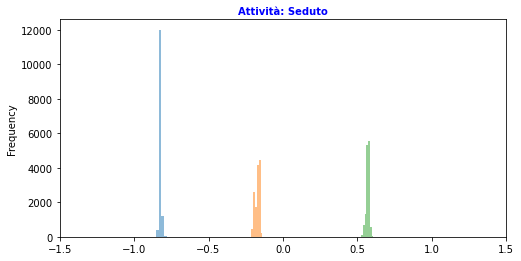

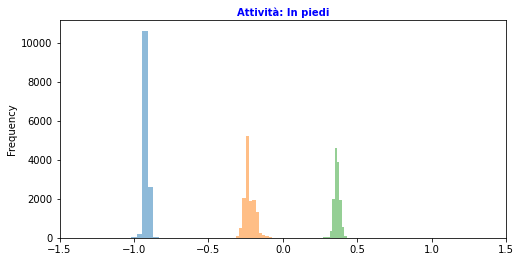

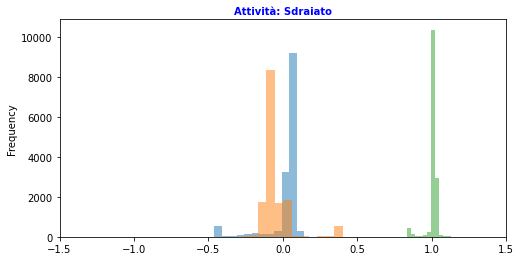

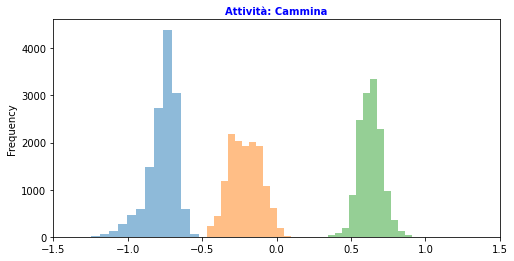

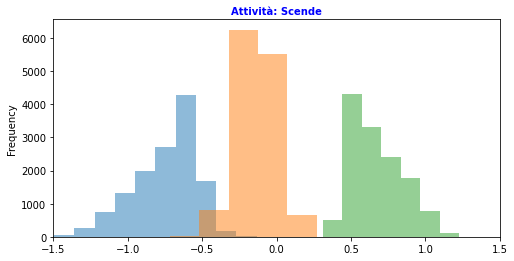

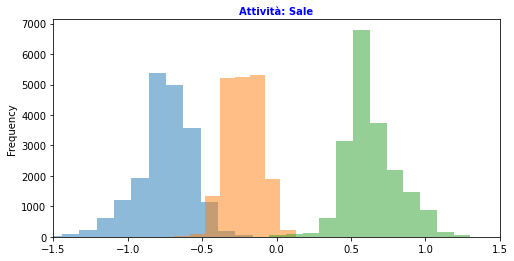

In [ ]:
plt.figure();
plt.rcParams['figure.figsize'] = [8, 4]
# plt.rcParams["hist.bins"] = 50
def plot_hist(df, t=""):
  plt.figure();
  plt.title("Attività: "+t, fontdict={'fontsize': 10, 'fontweight' : 'bold', 'color' : 'blue', \
                                           'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=5)
  ax = df['x-axis (g)'].plot.hist(bins=12, alpha=0.5)
  ay = df['y-axis (g)'].plot.hist(bins=12, alpha=0.5)
  az = df['z-axis (g)'].plot.hist(bins=12, alpha=0.5)
  plt.xlim(-1.5, 1.5)

plot_hist(sed, "Seduto")
plot_hist(inp, "In piedi")
plot_hist(sdr, "Sdraiato")
plot_hist(cam, "Cammina")
plot_hist(sce, "Scende")
plot_hist(sal, "Sale")


Miglioriamo l'estetica secondo i criteri della Data Visualization (crf Claus O. Wilke...)
> mettimo legenda assi, titolo del grafico, retinatura e colori per migliorare impatto visivo e leggibilità ..


<Figure size 576x288 with 0 Axes>

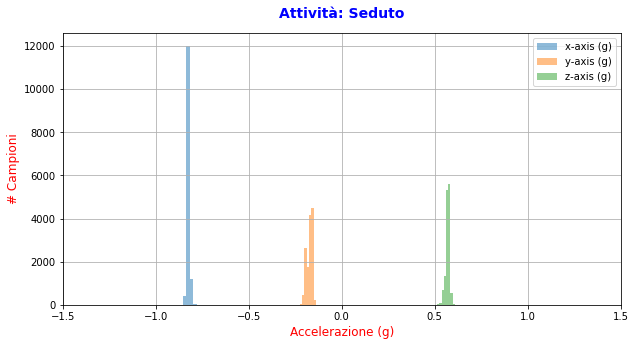

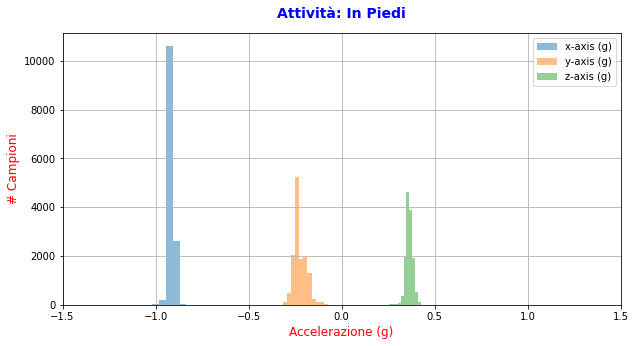

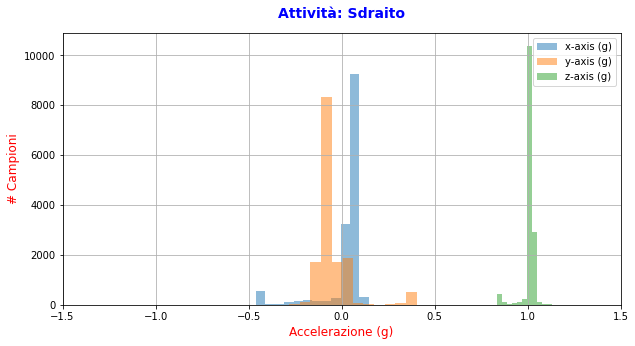

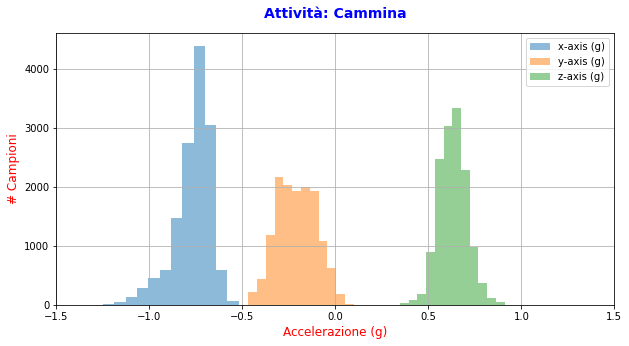

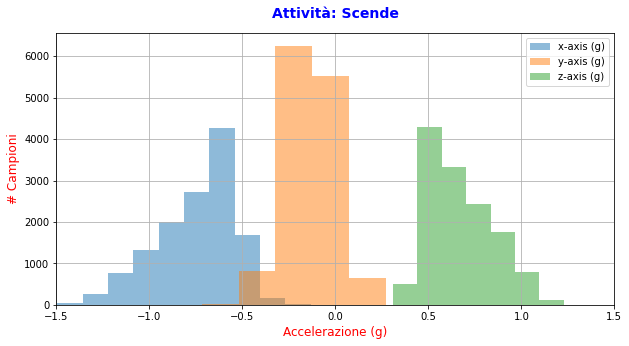

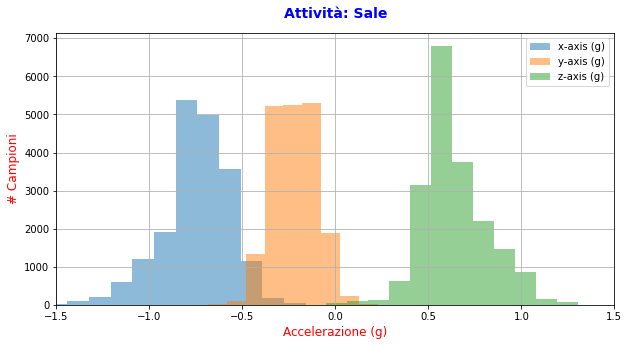

In [ ]:
plt.figure();
plt.rcParams['figure.figsize'] = [10, 5]

# plt.subplots(2,2)

def plot_hist(df,titolo=""):
  plt.figure();
  plt.title("Attività: "+titolo, fontdict={'fontsize': 14, 'fontweight' : 'bold', 'color' : 'blue', \
                                           'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=15)
  ax = df['x-axis (g)'].plot.hist(bins=12, alpha=0.5, legend=True, grid=True)
  ay = df['y-axis (g)'].plot.hist(bins=12, alpha=0.5, legend=True, grid=True)
  az = df['z-axis (g)'].plot.hist(bins=12, alpha=0.5, legend=True, grid=True)
  plt.xlim([-1.5, 1.5])
  # plt.ylim([0, 13000])
  plt.xlabel('Accelerazione (g)', fontdict={'fontsize': 12, 'color' : 'red'})
  plt.ylabel('# Campioni', fontdict={'fontsize': 12, 'color' : 'red'})

#########################################  
# plot singolarmente 1 istogramma
# plot_hist(sed, 'Seduto')
# plot_hist(inp, 'In Piedi')
# plot_hist(sdr, 'Sdraito')
# plot_hist(cam, 'Cammina')
# plot_hist(sce, 'Scende')
# plot_hist(sal, 'Sale')
########################################
# plot tutti istogrammi
df_list = [(sed, 'Seduto'), (inp, 'In Piedi'), (sdr, 'Sdraito'), (cam, 'Cammina'), (sce, 'Scende'), (sal, 'Sale')]

for el in df_list:  
  plot_hist(el[0], el[1])

#plot_hist(cam_n, 'Nuovo Cammina')



>Per meglio apprezzare il colpo d'occhio plottiamo su una griglia 2x3

<Figure size 720x360 with 0 Axes>

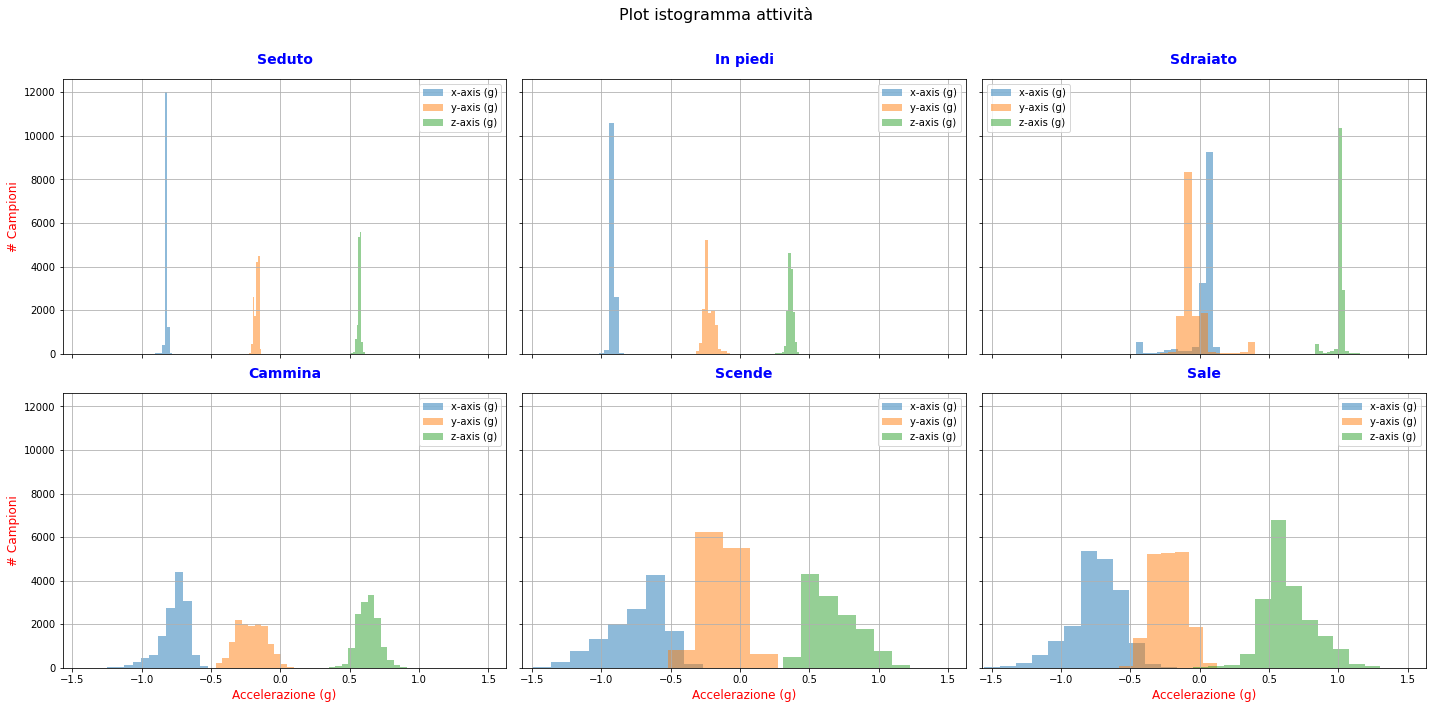

In [ ]:
# plot affiancato in righe e colonne
plt.figure();
plt.rcParams['figure.figsize'] = [20, 10]
def plot_in_rows(list_df, list_label, nr, nc, st=""):
  if (len(list_df)!=nc*nr):
    print("error")
    return
  fig, axes = plt.subplots(nrows=nr, ncols=nc, sharex=True, sharey=True,)  
  fig.suptitle(st, fontsize=16)
  # plt.xlim([-1.5, 1.5])
  # calcola xlim
  massimo = -float('inf'); minimo = float('inf');
  for x in df_list:
    massimo = max(massimo, max(x.iloc[:,0:-1].max()));  minimo = min(massimo, min(x.iloc[:,0:-1].min()));
  # print(round(massimo,2)+0.01, round(minimo,2)-0.01)


  for i in range(nr):
    for j in range(nc):
        axes[i,j].set_title(list_label[i*nc+j], fontweight="bold", size=14, color ='blue', loc='center', pad=15, horizontalalignment = 'center', verticalalignment = 'baseline')
        axes[i,j].set_xlabel('g-value')
        axes[i,j].set_ylabel('Frequency')

        ax = df_list[i*nc+j]['x-axis (g)'].plot.hist(ax=axes[i,j],bins=12, alpha=0.5, legend=True, grid=True)
        ay = df_list[i*nc+j]['y-axis (g)'].plot.hist(ax=axes[i,j],bins=12, alpha=0.5, legend=True, grid=True)
        az = df_list[i*nc+j]['z-axis (g)'].plot.hist(ax=axes[i,j],bins=12, alpha=0.5, legend=True, grid=True)
  for ax in axes.flat:
    #ax.set(xlabel='accelerazione (g)', ylabel='campioni')
    ax.set_xlabel('Accelerazione (g)', fontdict={'fontsize': 12, 'color' : 'red'})
    ax.set_ylabel('# Campioni', fontdict={'fontsize': 12, 'color' : 'red'})


  plt.xlim([round(minimo,2)-0.01, round(massimo,2)+0.01])  # setto un limite comune per asse X per migliore visualizzazione, con sharex = true poteva dare risultato simile
  # plt.xlabel('accelerazione (g)', fontdict={'fontsize': 12, 'color' : 'red'})
  # plt.ylabel('Frequenza', fontdict={'fontsize': 12, 'color' : 'red'})
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)
  plt.show()

df_list = [sed, inp, sdr, cam, sce, sal]
df_label = ["Seduto", "In piedi", "Sdraiato", "Cammina", "Scende", "Sale"]
plot_in_rows(df_list, df_label, 2, 3, "Plot istogramma attività")



####Funzioni di prova per il calcolo dei limiti delle x per tutti e 6 i dataset da visualizzare (NON PRESENTARE!!)

In [ ]:
df_list = [sed, inp, sdr, cam, sce, sal]
#print( df_list[max(x) for x in df_list] )

# elimino colonna label per la lista dei df
df_list2 = [x.iloc[:,0:-1] for x in df_list]
# prendo nome colonne da 1 dei df
col_names = df_list2[0].columns

for i,df in enumerate(df_list2):
  for col in col_names:
    print("Dataframe ", i, " - Max/Min di ", col, " is ", round(df.loc[:,col].max(),2), " / ", round(df.loc[:,col].min(),2))


Dataframe  0  - Max/Min di  x-axis (g)  is  -0.73  /  -0.94
Dataframe  0  - Max/Min di  y-axis (g)  is  -0.11  /  -0.27
Dataframe  0  - Max/Min di  z-axis (g)  is  0.61  /  0.47
Dataframe  1  - Max/Min di  x-axis (g)  is  -0.72  /  -1.17
Dataframe  1  - Max/Min di  y-axis (g)  is  -0.07  /  -0.34
Dataframe  1  - Max/Min di  z-axis (g)  is  0.45  /  0.25
Dataframe  2  - Max/Min di  x-axis (g)  is  0.15  /  -0.46
Dataframe  2  - Max/Min di  y-axis (g)  is  0.4  /  -0.28
Dataframe  2  - Max/Min di  z-axis (g)  is  1.16  /  0.84
Dataframe  3  - Max/Min di  x-axis (g)  is  -0.52  /  -1.25
Dataframe  3  - Max/Min di  y-axis (g)  is  0.1  /  -0.47
Dataframe  3  - Max/Min di  z-axis (g)  is  0.91  /  0.35
Dataframe  4  - Max/Min di  x-axis (g)  is  -0.13  /  -1.77
Dataframe  4  - Max/Min di  y-axis (g)  is  1.26  /  -1.11
Dataframe  4  - Max/Min di  z-axis (g)  is  1.62  /  0.05
Dataframe  5  - Max/Min di  x-axis (g)  is  -0.16  /  -1.56
Dataframe  5  - Max/Min di  y-axis (g)  is  0.54  /  -0.

In [ ]:
# mass = df_list[ max(x.iloc[:,0:-1].max()) for x in df_list ]
massimo = -float('inf'); minimo = float('inf');
for x in df_list:
  massimo = max(massimo, max(x.iloc[:,0:-1].max()));  minimo = min(massimo, min(x.iloc[:,0:-1].min()));
print(round(massimo,2)+0.01, round(minimo,2)-0.01)
# max(sed.iloc[:,0:-1].max())
# min(sed.iloc[:,0:-1].min())
# 1.6230000000000002 -1.557


1.6300000000000001 -1.57


In [ ]:
df_list =[sed, inp]
df_list =[sed.iloc[:,0:-1], inp.iloc[:,0:-1]]
for df in df_list:
  for name in df.columns:
    print(name)

x-axis (g)
y-axis (g)
z-axis (g)
x-axis (g)
y-axis (g)
z-axis (g)


### Serie temporale

Visualizziamo l'andamento nel tempo dei segnali campionati

> **N.B.: La serie temporale si puo' ottenere dal dataframe di Pandas direttamente**.  
> Y=df.iloc[:, -1:] -> restituisce pandas.core.frame.DataFrame, Y=df.iloc[:, -1] restituisce pandas.core.series.Series

<Figure size 360x720 with 0 Axes>

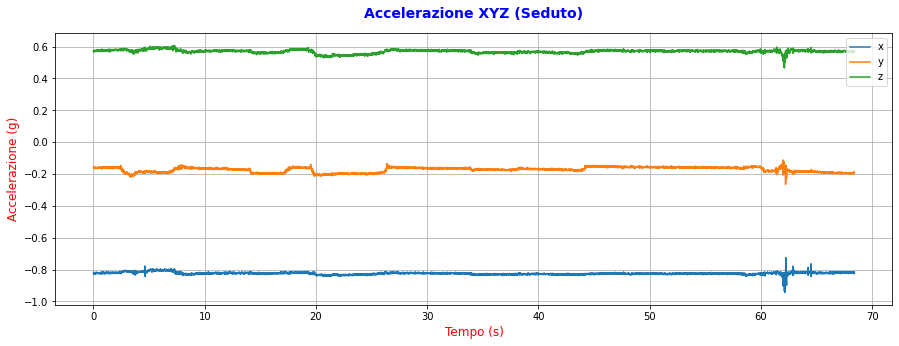

<Figure size 360x720 with 0 Axes>

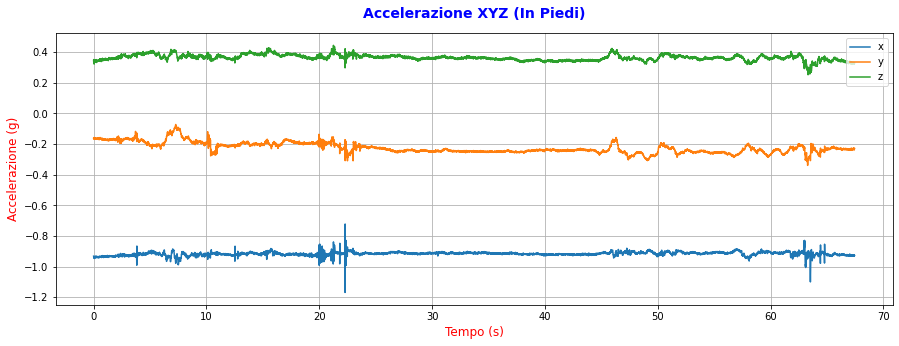

<Figure size 360x720 with 0 Axes>

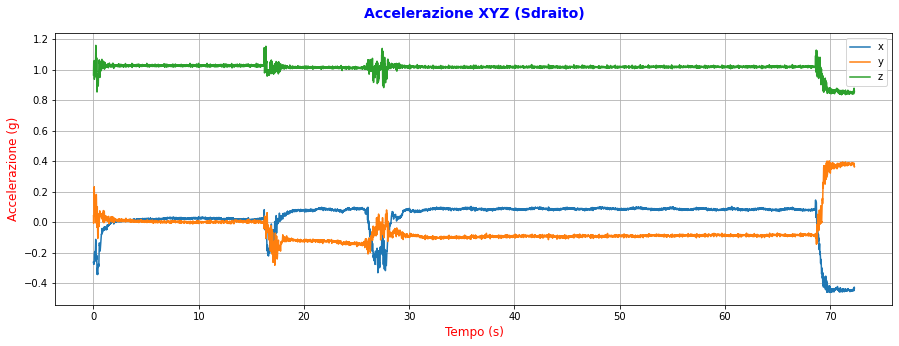

<Figure size 360x720 with 0 Axes>

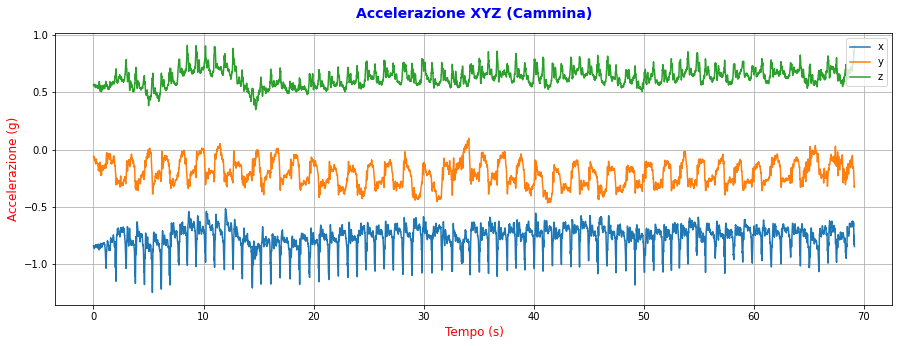

<Figure size 360x720 with 0 Axes>

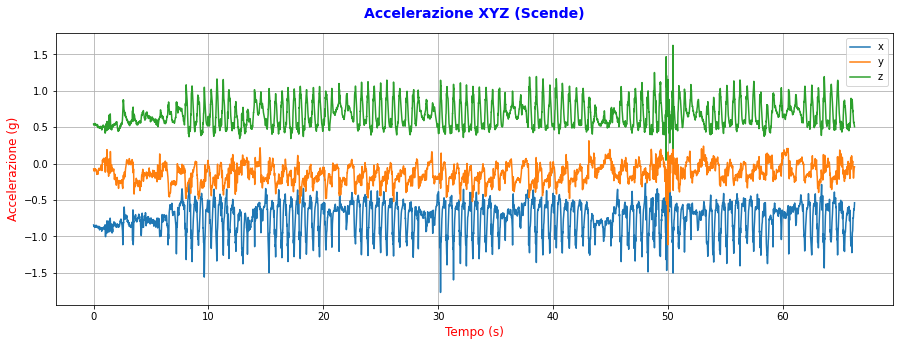

<Figure size 360x720 with 0 Axes>

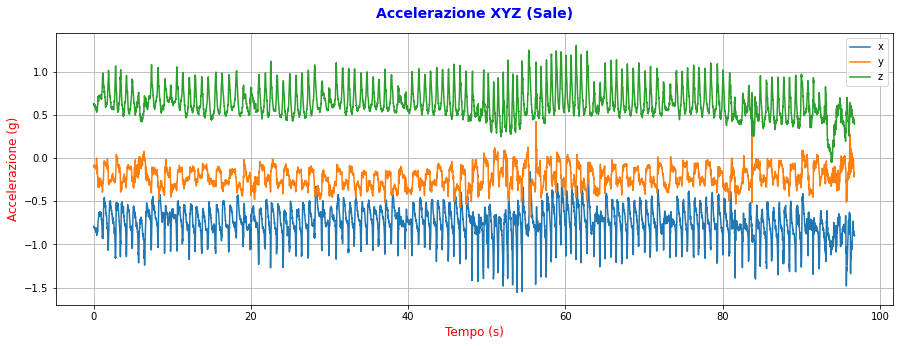

In [ ]:
def subsampl (array, step):
    sub_arr = np.zeros(int(len(array)/step))
    for i in range(int(len(array)/step)):
        sub_arr[i] = array[i*step]
    return sub_arr

 
def plot_graph (tab, ext = "-Accelerometer.csv", ext2=""):
    # stampa a partire dai csv
    # esempi:
    # plot_graph('inpiedi')
    # plot_graph('inpiedi', "_MetaWear.csv", "new")  
    print('###Read CSV files...');
    mytab = pd.read_csv(pathdir_read+tab+ext, header = 0, usecols=[3,4,5])
    # =============================================================================
    #     x = mytab['x-axis (g)'] # var x dati raw
    #     y = mytab['y-axis (g)'] 
    #     z = mytab['z-axis (g)'] 
    # =============================================================================
    plt.figure(figsize=(5,10))
    f, ax = plt.subplots(figsize=(15, 5))
    mytab2=mytab[:]
    ax.plot(mytab2)
    ax.legend(['x', 'y', 'z'])
    plt.xlabel('samples')
    plt.ylabel('accel (g)')
    plt.title('Accelerazione XYZ (%s) (%s)'%(tab,ext2))
    plt.show()

def plot_graph2 (df, ext2=""):
    plt.figure(figsize=(5,10))
    f, ax = plt.subplots(figsize=(15, 5))
    # x viene trasformata in tempo...segnale campionato a 200Hz, ogni 200 campioni è trascorso 1 secondo..asse_x = [x/200 for x in range(len(df))]..sostituendo nella funzione..
    ax.plot([x/200 for x in range(len(df))], df.iloc[:,:-1]) # prende tutte le righe e tutte le colonne meno l'ultima (la col delle label)
    plt.xlabel('Tempo (s)', fontdict={'fontsize': 12, 'color' : 'red'})
    # ax.plot(df.iloc[:,:-1]) # prende tutte le righe e tutte le colonne meno l'ultima (la col delle label)
    # plt.xlabel('# Campioni', fontdict={'fontsize': 12, 'color' : 'red'})

    plt.ylabel('Accelerazione (g)', fontdict={'fontsize': 12, 'color' : 'red'})
    ax.legend(['x', 'y', 'z'], loc='upper right')
    plt.grid()
    plt.title('Accelerazione XYZ (%s)'%(ext2), fontdict={'fontsize': 14, 'fontweight' : 'bold', \
              'color' : 'blue', 'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=15)
    
    plt.show()

df_list = [(sed, 'Seduto'), (inp, 'In Piedi'), (sdr, 'Sdraito'), (cam, 'Cammina'), (sce, 'Scende'), (sal, 'Sale')]

for el in df_list:  
  plot_graph2(el[0], el[1])



###Grafici di confronto

Poichè servirà mettere a confronto, con plot affiancati, i dataset originali con altri rilevati in condizioni e soggetti differenti a parità di attività definiamo anche una funzione per stampare i plot in modo affincato (tabella 1x2)

> Per questa rappresentazione usiamo le funzioni di **matplotlib** per creare i subplots affiancati dopo poter visualizzare gli istogrammi.

>Plottiamo per un solo caso...per gli altri non cambia

<Figure size 1152x576 with 0 Axes>

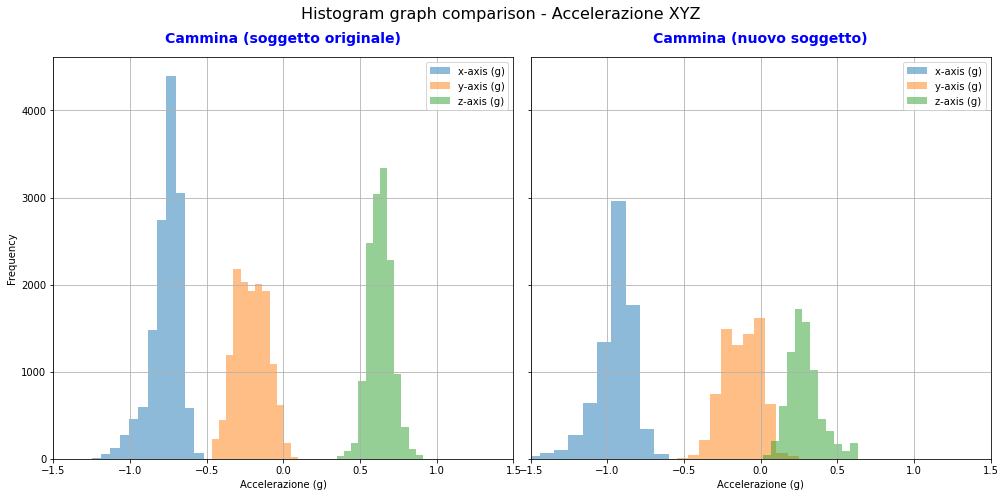

In [ ]:
cam_n = pd.read_csv(pathdir_read+"cammina_MetaWear.csv", header = 0, usecols=[3,4,5])
cam_n ['label']= CAMMINA 
plt.figure();
plt.rcParams['figure.figsize'] = [14, 7]
def plot_hist_comparison(df1, df2, title1="", title2=""):

  fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,)
  fig.suptitle("Histogram graph comparison - Accelerazione XYZ", fontsize=16)

  axes[0].set_title(title1, fontweight="bold", size=14, color ='blue', loc='center', pad=15, horizontalalignment = 'center', verticalalignment = 'baseline')
  axes[0].set_xlabel('Accelerazione (g)')
  axes[0].set_ylabel('# Campioni')
  ax = df1['x-axis (g)'].plot.hist(ax=axes[0],bins=12, alpha=0.5, legend=True, grid=True)
  ay = df1['y-axis (g)'].plot.hist(ax=axes[0],bins=12, alpha=0.5, legend=True, grid=True)
  az = df1['z-axis (g)'].plot.hist(ax=axes[0],bins=12, alpha=0.5, legend=True, grid=True)

  # plt.figure();
  axes[1].set_title(title2, fontweight="bold", size=14, color ='blue', loc='center', pad=15, horizontalalignment = 'center', verticalalignment = 'baseline')
  axes[1].set_xlabel('Accelerazione (g)')
  axes[1].set_ylabel('# Campioni')
  ax = df2['x-axis (g)'].plot.hist(ax=axes[1], bins=12, alpha=0.5, legend=True, grid=True)
  ay = df2['y-axis (g)'].plot.hist(ax=axes[1], bins=12, alpha=0.5, legend=True, grid=True)
  az = df2['z-axis (g)'].plot.hist(ax=axes[1], bins=12, alpha=0.5, legend=True, grid=True)
  fig.tight_layout()
  fig.subplots_adjust(top=0.88)
  plt.xlim([-1.5, 1.5])
  plt.show()


plot_hist_comparison( cam, cam_n, 'Cammina (soggetto originale)', 'Cammina (nuovo soggetto)')

# si possono plottare allo stesso modo tutte le altre attività 


###Controllo di correlazione tra le features del dataset
>Si può notare una debole correlazione tra le accelerazione lungo l'asse X e le Z, anche l'analisi per una stessa attività mostra correlazini non significative  
Invece vedremo con la **variable importance** (in qualche modo correlata alla PCA) che una features delle tre è più significativa delle altre nella classificazione, specie nei modelli di classificazione basati su Alberi di decisione (DT e GBA o XGB). Per un esempio [https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis] 


In [ ]:
df.iloc[:,:-1].corr()  # OCCHIO: x e z sono abbastanza correlate....0,67...ma non in modo significativo
df_features.corr()

# x-axis (g)	y-axis (g)	z-axis (g)
# x-axis (g)	1.000000	0.41560	0.676239
# y-axis (g)	0.415600	1.00000	0.316170
# z-axis (g)	0.676239	0.31617	1.000000

,x-axis (g),y-axis (g),z-axis (g)
x-axis (g),1.000000,0.41560,0.676239
y-axis (g),0.415600,1.00000,0.316170
z-axis (g),0.676239,0.31617,1.000000


###Heatmap della correlazione tra variabili (features)

Visualizziamo le correlazioni tra le features... usando **seaborn** 
Prendiamo in considerazione tutte e 6 le attività e vediamo che la correlazione non è trascurabile e maggiore tra le X e le Z

>**NB**: Prendiamo il valore assouluto della correlazione perchè non ci interessa visualizzare valori negativi!

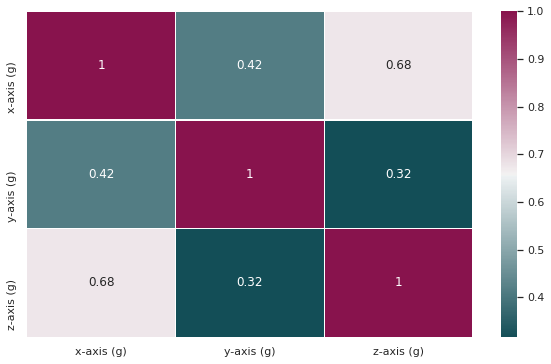

In [27]:
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
plt.figure();
sns.set_theme()

Var_Corr = abs(df.iloc[:,:-1].corr())
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)  # i colori possono essere settati anche con cmap = 'blue' o cmap='RdBu_r'
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, linewidths=0.5, cmap=cmap,)

### Heatmap di correlazione tra variabili per attività

Elaboriamo in modo un po' più sofosticato il plot della Heatmap presentando solo il triangolo inferiore della matrice dei valori (gli elementi della diagonale valgono 1 e la parte superiore è la simmetrica di quella inferiore)

>ogni attività ha una correlazione che puo' essere diversa tra gli assi xyz, quindi conviene analizzarli singolarmente  

>**NB**:  I parametri vmin=0, vmax=1 a sns.heatmap() consente di avere un riscontro uniforme dei valori di correlazione tra i vari grafici


<Figure size 720x432 with 0 Axes>

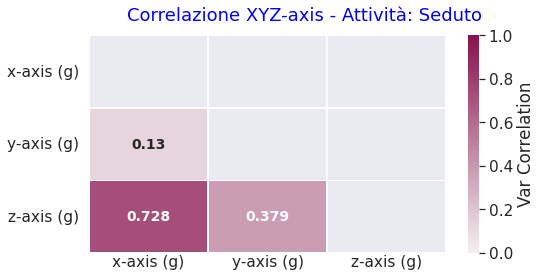

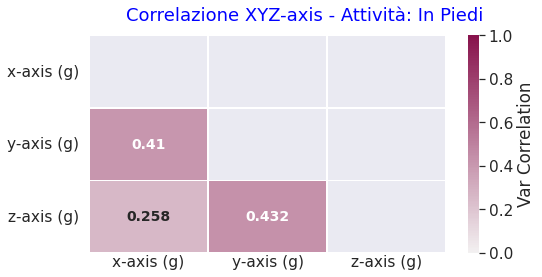

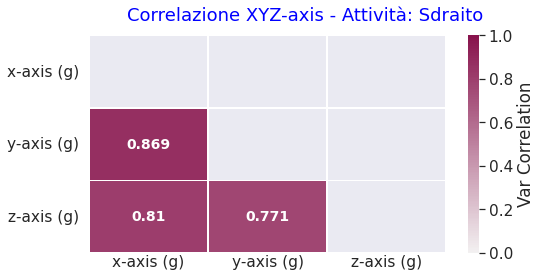

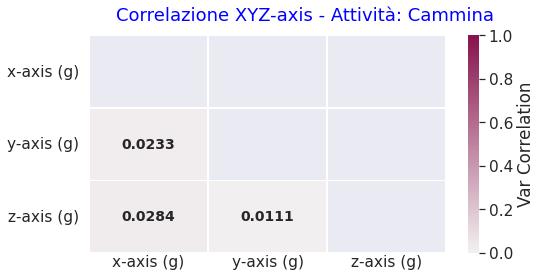

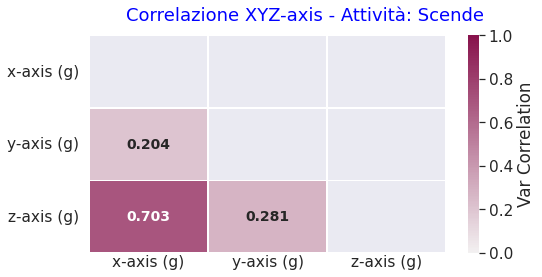

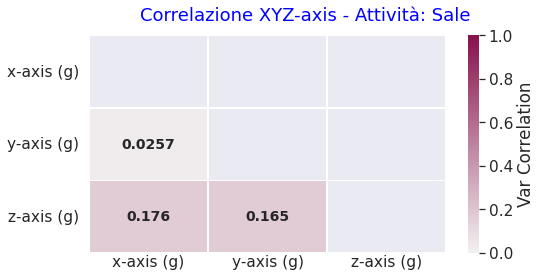

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ogni attività ha una correlazione che puo' essere diversa tra gli assi xyz, quindi conviene analizzarli singolarmente
def heat_map(df, title):

  plt.suptitle('Correlazione XYZ-axis - Attività: '+title, fontsize=18, color='blue')
 
  sns.set(font_scale=1.4)
  # seleziono le prime 3 colonne, elimino le label
  Var_Corr = abs(df.iloc[:,:-1].corr()) 
  # plot the heatmap and annotation on it
  cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)  # i colori possono essere settati anche con cmap = 'blue' o cmap='RdBu_r'
  # questa stampa la tabella completa
  # ans = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, linewidths=0.5, cmap=cmap, center=0)

  # # remove the top right triange - duplicate information
  mask = np.zeros_like(Var_Corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  # plot del solo 'lower triangle matrix'
  ans=sns.heatmap(Var_Corr, mask=mask,  annot=True, fmt='.3g', linewidths=0.5, cmap=cmap, center=0, yticklabels=Var_Corr.columns, annot_kws={'fontsize': 14, 'fontweight' : 'bold'}, \
                  cbar_kws={"label": "Var Correlation"}, vmin=0, vmax=1 )
  # NB vmin=0, vmax=1 consente di avere una colorazione uniforme tra i vari grafici per confronto
  plt.yticks(rotation=0, va="center") # si puo' specificare ance la fontsize p.e. fontsize="10"
  plt.xticks(rotation=0, va="center")
  #save image 
  # figure = ans.get_figure()    
  # figure.savefig('correlations.png', dpi=800)
  plt.show()

plt.rcParams['figure.figsize'] = [10, 6]
plt.figure();

df_list = [(sed, 'Seduto'), (inp, 'In Piedi'), (sdr, 'Sdraito'), (cam, 'Cammina'), (sce, 'Scende'), (sal, 'Sale')]
plt.rcParams['figure.figsize'] = [8, 4]
plt.figure(); # set deault value, plt.rcParams must be called before this

for el in df_list: 
  heat_map(el[0], el[1])

# mettiamole in grid


####...Visualizzazione a griglia

Text(0.5, 0.98, 'Correlazione tra Accelerazione XYZ divisa per Attività')

<Figure size 576x288 with 0 Axes>

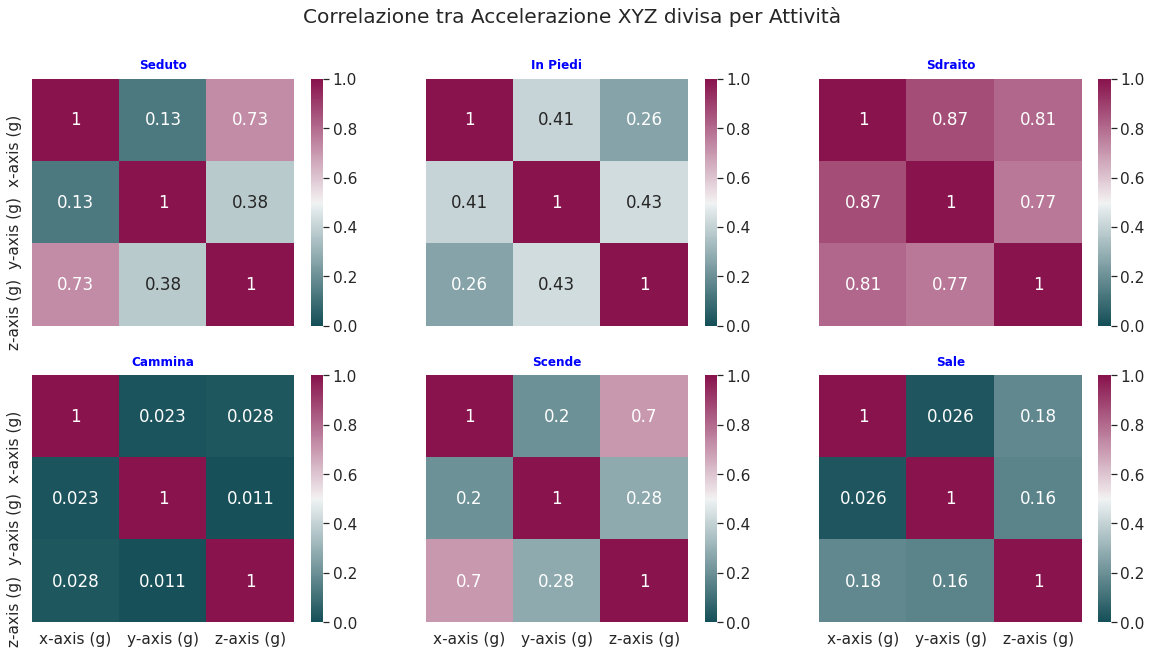

In [ ]:
#plt.rcParams['figure.figsize'] = [14, 8]
plt.figure(); # set deault value, plt.rcParams must be called before this
# example data
label_txt = ['Seduto','In Piedi','Sdraito','Cammina','Scende','Sale'] # label_text[SEDUTO] => restituisce 'Seduto'
names = label_txt
nr =2; nc=3 # nc*nw deve essere uguale a len(labl_txt)
assert nc*nr == len(label_txt)
fig, axes = plt.subplots(nr, nc, figsize=(20, 10), sharex=True, sharey=True) # figsize=(10, 5) to set sie for single plot, constrained_layout=True does'n't work here

i =0 # indice dell'attivtà nella lista label_txt
for name, ax in zip(names, axes.flatten()):
  ax.set_title(label_txt[i], fontweight="bold", size=12, color ='blue', loc='center', pad=10, horizontalalignment = 'center', verticalalignment = 'baseline')
  data = df[df['label']==i].iloc[:,:-1]  # seleziono l'attività
  Var_Corr = abs(data.corr())
  cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
  sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, ax=ax, cmap=cmap, vmin=0, vmax=1 )
  i = i+1
# plt.ylabel(list(df.columns[:-1]),fontdict={}, rotation=0, va="center") # si puo' specificare ance la fontsize p.e. fontsize="10", non funziona
# plt.xticks(rotation=0, va="center")
plt.suptitle("Correlazione tra Accelerazione XYZ divisa per Attività")   
# See Matplotlib tight_layout() https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle doesn't take into account figure suptitle fig.tight_layout(rect=[0, 0.03, 1, 0.95]) – Avi Vajpeyi Jun 22 '20 at 10:02 
# plt.tight_layout()

####Pairplot tra coppie di variabili
Indagine ulteriore...

Appare 'curioso' la correlazione cosi' diversa delle X e Z tra due attività apparentemente molto simili (sale e scende)..approfondimao con una **pairplot**.  
>La pairplot non ci svela nulla di particolare, sembrano comunque distribuzioni simili senza particolari relazioni distintive (la X e la Z appaiono in distribuzione verticale vs le Z e le Y in orizzontale Z e X appaiono distribuite in modo casuale).

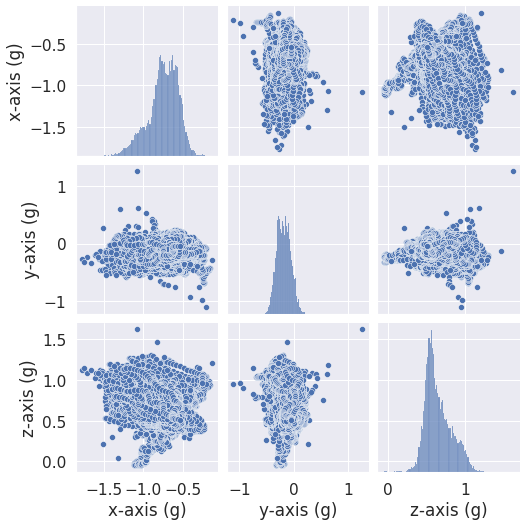

In [ ]:
sns.pairplot(pd.concat([sal, sce], ignore_index=True).iloc[:, :-1])

In [ ]:
# per selezionare 1 attivita dal df
df.iloc[:,[0,1,2,3]][df['label'] ==0] # equivale a df[df['label'] ==0]

,x-axis (g),y-axis (g),z-axis (g),label
0,-0.818,-0.156,0.572,0
1,-0.826,-0.158,0.577,0
2,-0.824,-0.159,0.576,0
3,-0.825,-0.160,0.570,0
4,-0.823,-0.157,0.573,0
...,...,...,...,...
13679,-0.813,-0.190,0.573,0
13680,-0.814,-0.193,0.572,0
13681,-0.816,-0.194,0.569,0
13682,-0.816,-0.190,0.571,0


###Altre rappresentazioni della distribuzione per attività (histplot e displot con kernel 'kde')

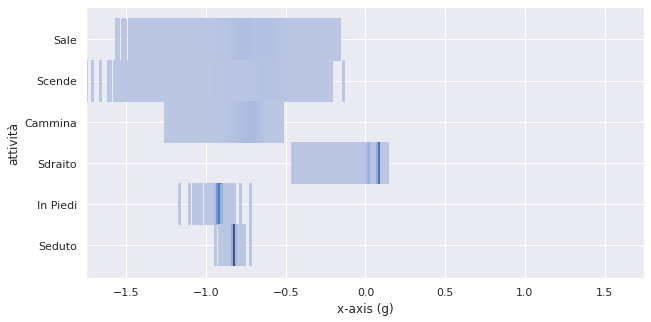

<Figure size 720x360 with 0 Axes>

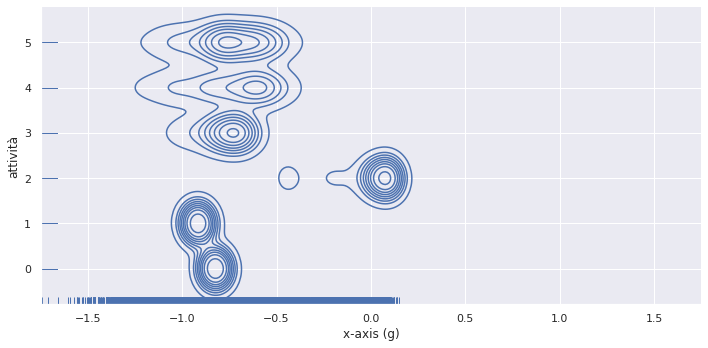

In [28]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(); # set deault value, plt.rcParams must be called before this
# non riesco ad invertire l'ordine di stampa delle y .. provo a rovesciare i dataframe..sembra che funziona oppure settare col_order nella displot
label_txt = ['Seduto','In Piedi','Sdraito','Cammina','Scende','Sale'] # label_text[SEDUTO] => restituisce 'Seduto'
df_tot = df
df_tot['attività'] = [ label_txt[x] for x in df_tot['label']]
df_tot = df_tot.iloc[::-1] # inverte ordine per seguire la displot, la ax.invert_yaxis() non mi funziona ??

axxxx = sns.histplot(data=df_tot, x="x-axis (g)", y='attività')
plt.xlim(-1.75, 1.75)
plt.show()

plt.rcParams['figure.figsize'] = [10, 5]
plt.figure(); # set deault value, plt.rcParams must be called before this

axx = sns.displot(  df_tot, x="x-axis (g)", y="label",   kind="kde", rug=True, height =5, aspect = 2) # settare col_order nella displot per cambiare ordine
axx.set(ylabel='attività')
plt.xlim(-1.75, 1.75)
plt.show()



###Distribuzione univariata delle accelerazioni lungo i diversi assi X, Y, Z divise per attività
> Per l'attività Seduto, In piedi, Sdraiato i valori dell'acc. lungo l'asse X e Z sono abbastanza separati (colore più scuro corrisponde ad una maggiore frequenza di valori), meno separazione per la Y

> Le attività Cammina, Scende e Sale mostrano invece una distribuzione abbastanza sovapposta e dispersa nei valori assunti, che si rifletterà in una maggiore difficoltà di classificazione


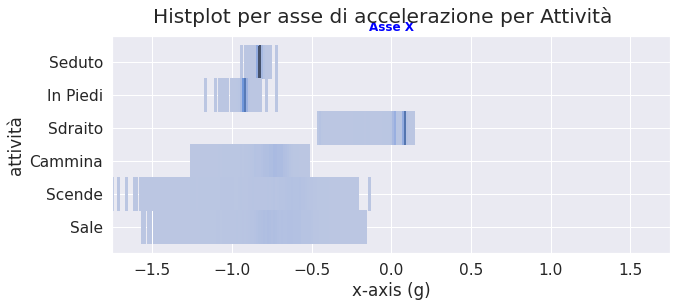

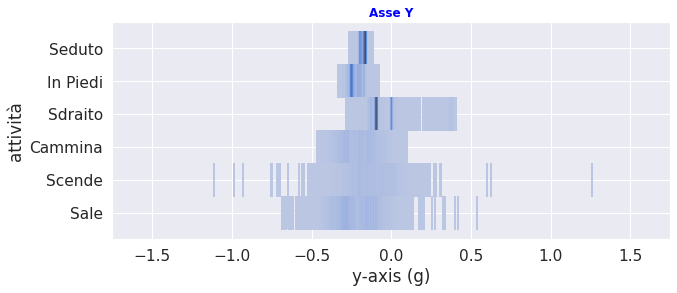

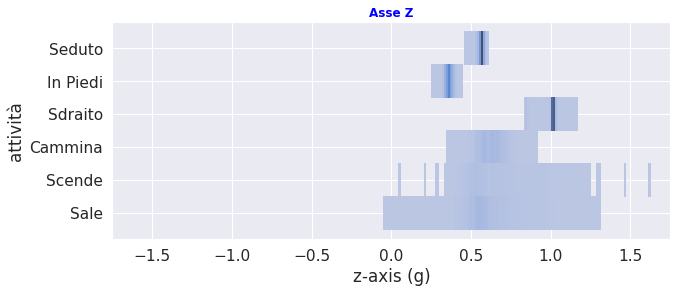

In [ ]:
#  displot per x, y e z per attività
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure(); # set deault value, plt.rcParams must be called before this
df_tot = df.copy()
label_txt = ['Seduto','In Piedi','Sdraito','Cammina','Scende','Sale'] # label_text[SEDUTO] => restituisce 'Seduto'
names = df_tot.columns[0:3]

df_tot['attività'] = [ label_txt[x] for x in df_tot['label']] # side-effect su df..puntano agli stessi dati

# i =0
# for name, ax in zip(names, axes.flatten()):
#   ax.set_title(name, fontweight="bold", size=12, color ='blue', loc='center', pad=5, horizontalalignment = 'center', verticalalignment = 'baseline')
#   sns.histplot(data=df_tot, x=df_tot.columns[i], y="attività")
#   plt.suptitle("Histplot per asse di accelerazione per Attività [ (%s) ]"%(name))  
#   plt.xlim(-1.75, 1.75)
#   plt.show()
#   i = i+1

i =0
plt.suptitle("Histplot per asse di accelerazione per Attività")  #  + "[ (%s) ]"%(name)
for name in names:
  ax=sns.histplot(data=df_tot, x=df_tot.columns[i], y="attività")
  ax.set_title("Asse " +name[0].upper(), fontweight="bold", size=12, color ='blue', loc='center', pad=5, horizontalalignment = 'center', verticalalignment = 'baseline')
  plt.xlim(-1.75, 1.75)
  plt.show()
  i = i+1

###Distribuzione di un tipo di accelerazione per tutte le attività
Un altro tipo di visualizzazione forse ancora più efficace per vedere la forma delle distribuzioni delle accelerazioni lungo gli assi per attività è la seguente, dove per ciascuna attività sono mostrate come sono distribuiti (count ovvero conteggio) i valori delle accelerazioni a parità di asse. 


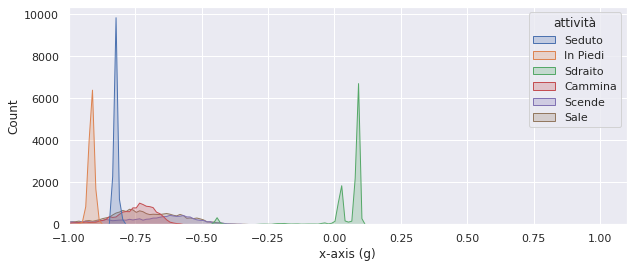

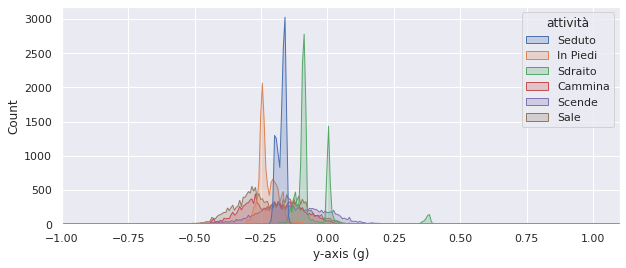

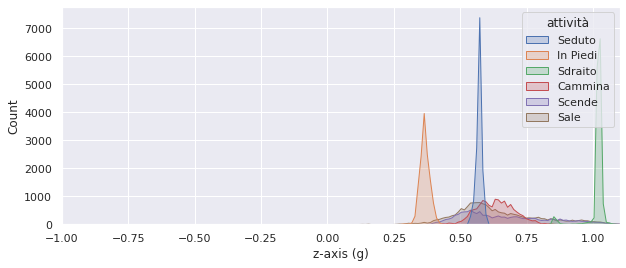

In [ ]:
#sns.histplot(df, x=df.iloc[:,[0,1,2]][df['label'] ==0])
plt.rcParams['figure.figsize'] = [10, 4] 
plt.figure(); # set deault value, plt.rcParams must be called before this

df_tot = df.copy()
df_tot['attività'] = [ label_txt[x] for x in df_tot['label']]
sns.histplot(df_tot, x="x-axis (g)", hue="attività", element="poly")
plt.xlim(-1.0,1.1); plt.show()
sns.histplot(df_tot, x="y-axis (g)", hue="attività", element="poly")
plt.xlim(-1.0,1.1); plt.show()
sns.histplot(df_tot, x="z-axis (g)", hue="attività", element="poly")
plt.xlim(-1.0,1.1); plt.show()

>E' possibile plottare la curva di densità, e variando il **kernel** e parametri della displot ottenere visualizzazione differenti; la **bandwidth** e' possibile variarla solo nella displot (impostando kde_kws={"bw":bandwidth})

<Figure size 720x288 with 0 Axes>

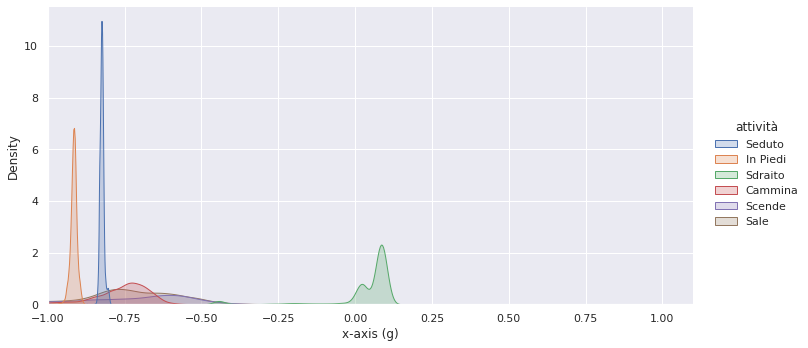

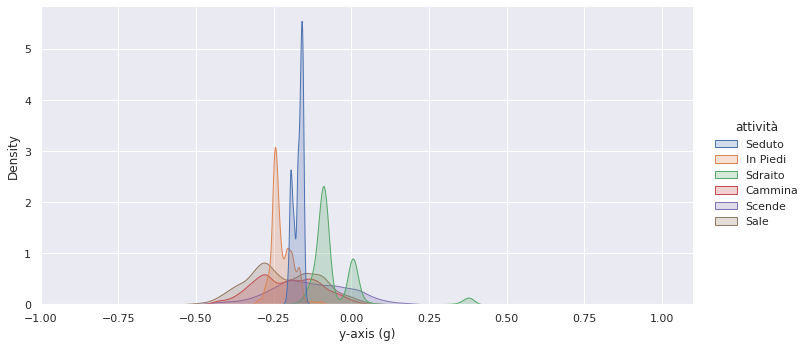

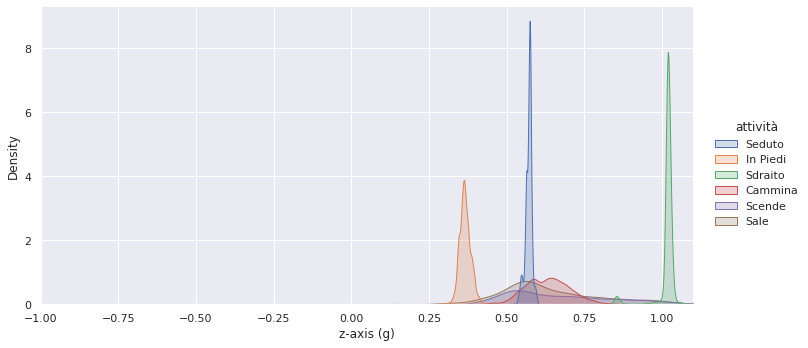

In [ ]:
#sns.histplot(df, x=df.iloc[:,[0,1,2]][df['label'] ==0])
plt.rcParams['figure.figsize'] = [10, 4] # per la displot settare hieght e aspect
plt.figure(); # set deault value, plt.rcParams must be called before this

df_tot = df.copy()
df_tot['attività'] = [ label_txt[x] for x in df_tot['label']]
sns.displot(df_tot, x="x-axis (g)", hue="attività", kind="kde", fill=True, height=5, aspect=2) # , fill=True o  multiple="stack"
plt.xlim(-1.0,1.1); plt.show()
sns.displot(df_tot, x="y-axis (g)", hue="attività", kind="kde", fill=True, height=5, aspect=2)
plt.xlim(-1.0,1.1); plt.show()
sns.displot(df_tot, x="z-axis (g)", hue="attività", kind="kde", fill=True, height=5, aspect=2)
plt.xlim(-1.0,1.1); plt.show()


###Violin Plot
Chiudiamo con il plot di uno dei grafici più belli...il Violin Plot
[https://seaborn.pydata.org/generated/seaborn.violinplot.html]

Draw a combination of boxplot and kernel density estimate.

>Disegna una combinazione di boxplot e stima della densità del kernel.
Il violin plot in modo simile a un box plot (o whisker plot https://it.wikipedia.org/wiki/Diagramma_a_scatola_e_baffi). Mostra la distribuzione dei dati quantitativi su più livelli di una (o più) variabili categoriali in modo che tali distribuzioni possano essere confrontate. A differenza di un boxplot, in cui tutti i componenti del diagramma corrispondono a punti dati effettivi, il diagramma a violino presenta una stima della densità del kernel della distribuzione sottostante.

Questo può essere un modo efficace e attraente per mostrare più distribuzioni di dati contemporaneamente, ma la procedura di stima è influenzata dalla dimensione del campione e i violini per campioni relativamente piccoli potrebbero essere fuorvianti.


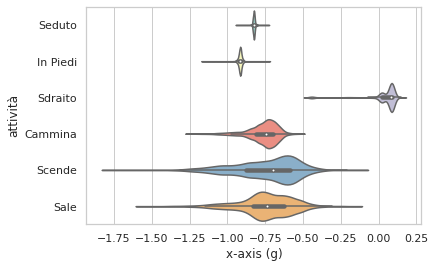

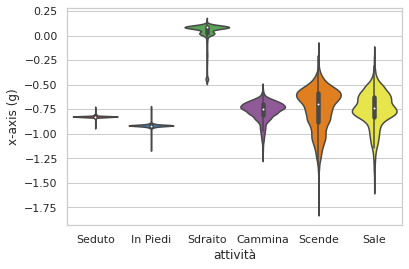

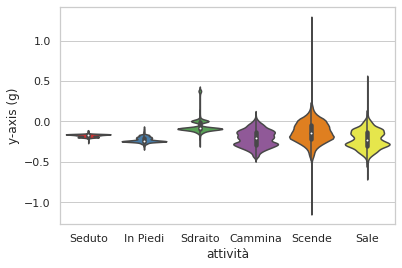

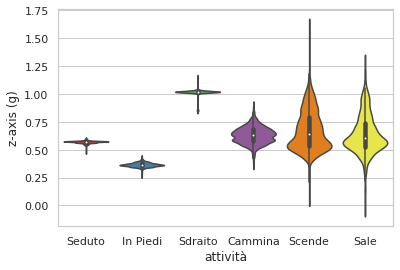

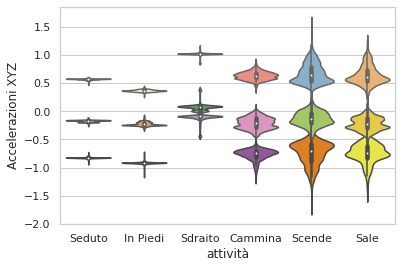

In [43]:
import seaborn as sns
sns.set_theme(style="whitegrid")
df_tot = df.copy()
df_tot['attività'] = [ label_txt[x] for x in df_tot['label']]

# orizzontale
ax = sns.violinplot(x=df_tot['x-axis (g)'], y=df_tot['attività'] , palette="Set3",  scale="width",);plt.show();

# verticale
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['x-axis (g)'], palette="Set1",  scale="width", );plt.show();
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['y-axis (g)'], palette="Set1",  scale="width", );plt.show();
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['z-axis (g)'], palette="Set1",  scale="width", );plt.show()
# tutte e 3 le accelerazioni insieme...
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['x-axis (g)'], palette="Set1",  scale="width", ) # data=df_tot['x-axis (g)']
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['y-axis (g)'], palette="Set2",  scale="width", ) # data=df_tot['x-axis (g)']
ax = sns.violinplot(x=df_tot['attività'], y=df_tot['z-axis (g)'], palette="Set3",  scale="width", ) # data=df_tot['x-axis (g)']
plt.ylabel('Accelerazioni XYZ')
plt.show()



### <font color="red">✪</font> Plot 3D (solo curiosità...) [ **plotly.express** ]
> Ai soli fini di curiosità, per verificare efefettivamente quanto siano linearmente separabili i dati (la SVM lineare ci da' un 60% circa di accuracy...solo con kernel rbf si arriva a elaborare una migliore funzione ipotesi con 81% circa..)  

Usiamo prima matplotlib e poi vediamo un tool per plot 3D molto potente..**plotly.express**, una libreria open source che riesce a fare il plot 3D con pan e zoom sui dati con 2 righe di codice

No handles with labels found to put in legend.


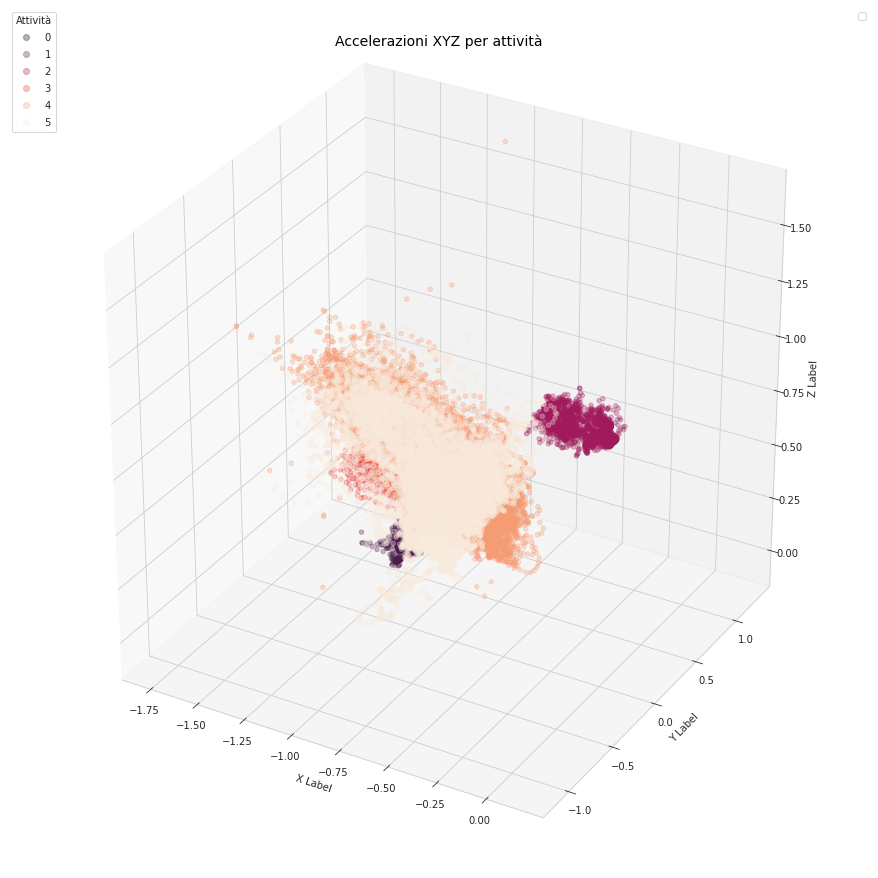

In [ ]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,12))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

# for label in np.unique(df.label):
#   x = df[(df.label==label)]['x-axis (g)'].to_numpy()
#   y = df[(df.label==label)]['x-axis (g)'].to_numpy()
#   z = df[(df.label==label)]['x-axis (g)'].to_numpy()
#   c = df[(df.label==label)]['label'].to_numpy()
#   ax.scatter(x, y, z, c=c, label=c[0], marker='o')
#   ax.set_xlabel('X Label')
#   ax.set_ylabel('Y Label')
#   ax.set_zlabel('Z Label')
#   ax.legend()

# plt.show()

x = df[df.columns[0]].to_numpy() # 'x-axis (g)'
y = df[df.columns[1]].to_numpy() # 'y-axis (g)'
z = df[df.columns[2]].to_numpy() # 'z-axis (g)'
c = df[df.columns[3]].to_numpy()
scatter = ax.scatter(x, y, z, c=c, marker='o', alpha=0.3)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Accelerazioni XYZ per attività', pad=30, fontdict={'fontsize': 14, 'color' : 'black'})


# produce a legend with the unique colors from the scatter ##   i colori NON TORNANO
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Attività")
ax.add_artist(legend1)
ax.legend()
plt.show()

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html

In [ ]:
# !pip install -q plotly==5.1.0
# !pip install cufflinks
import plotly.expressplotly.express as px
fig = px.scatter_3d(df, x='x-axis (g)', y='y-axis (g)', z='z-axis (g)', color='label')
fig.show()
# shift-tasto sinistro per ruotare gli assi... rotella per pan e zoom

ModuleNotFoundError: ignored

## <font size=5 color='blue'>**Fase 3. Crezione del modello di Machine Learning**</font>

Elaboriamo il modello di ML per la classificazione delle attività umane rilevate dal sensore

1. Si crea un dataframe unico con le 6 attività 

1. Si fa la normalizzazione dei dati per aiutare il modello ad essere più efficace
1. Vengono creati di dataset di training e di test e si addestra il modello
1. Si valutano le prestazione del modello (o eventuali vari modelli) sui dati di test  

Al termine si dovrebbe effettuare la validazione del/dei modelli su dati provenienti da soggetti differenti per provare l'effettiva efficacia del modello e valutare l' evenutale deploymnent

### <font color="red">✪</font> 3.0 Creazione di un Dateset unico

In [3]:
df = pd.concat([sed, inp, sdr,cam,sce,sal], ignore_index=True)
print(df.head())
print(df.shape)

   x-axis (g)  y-axis (g)  z-axis (g)  label
0      -0.818      -0.156       0.572      0
1      -0.826      -0.158       0.577      0
2      -0.824      -0.159       0.576      0
3      -0.825      -0.160       0.570      0
4      -0.823      -0.157       0.573      0
(88080, 4)


###Controllo esistenza valori nulli o invalidi (NaN)

In [ ]:
print(df.isnull().sum())

x-axis (g)    0
y-axis (g)    0
z-axis (g)    0
label         0
dtype: int64


### <font color="red">✪</font> 3.1 Creazione dataset di features & labels
>**NB: c'e' differenza tra:**  
 - **Y=df.iloc[:, -1:]** -> restituisce pandas.core.frame.DataFrame,  
 - **Y=df.iloc[:, -1]** -> restituisce pandas.core.series.Series**

In [4]:
X= df.iloc[:, :-1] # pandas df delle features
Y= df.iloc[:, -1] # pandas series delle label
# NB c'e' differenza tra Y=df.iloc[:, -1:] -> restituisce pandas.core.frame.DataFrame,  Y=df.iloc[:, -1] restituisce pandas.core.series.Series
print("X head:\n",X.head())
print("\nY head:\n",Y.head())
print()
print("Tipo delle X", type(X), "- shape:", X.shape )
print("Tipo delle Y", type(Y), "- shape:", Y.shape)

X head:
    x-axis (g)  y-axis (g)  z-axis (g)
0      -0.818      -0.156       0.572
1      -0.826      -0.158       0.577
2      -0.824      -0.159       0.576
3      -0.825      -0.160       0.570
4      -0.823      -0.157       0.573

Y head:
 0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

Tipo delle X <class 'pandas.core.frame.DataFrame'> - shape: (88080, 3)
Tipo delle Y <class 'pandas.core.series.Series'> - shape: (88080,)


### <font color="red">✪</font> 3.2 Normalizzazione dei dati (Data Standardisation)
La normalizzazione (standardization) effettua la trasformazione di una distribuzione di dati in forma normale, ovvero ne deriva una distribuzione in cui ciascun attributo ha media nulla e varianza (o deviazione standards) unitaria.
>E' utile normalizzare gli attribuiti di un dataset per derivare modelli di machine learning, specie con scikit-learn, che performa meglio su features che mostrano dati con distribuzione in forma normale 

In [5]:
X= df.iloc[:, :-1] # pandas df delle features
Y= df.iloc[:, -1] # pandas series delle label
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
media = scaler.mean_
stdDev = scaler.scale_
print("X mean: ", scaler.mean_)
print("X std dev (squadre root of variance): ", scaler.scale_)
#X_df = X
X = scaler.transform(X)
# X = scaler.fit_transform(X)
# # X e' ora un nparray, non piu' dataframe !!



X mean:  [-0.65976029 -0.17043193  0.65149346]
X std dev (squadre root of variance):  [0.33937051 0.11302896 0.21845336]


####Verifica normalizzazione

-9.293201993592591e-17 -2.0651559985761313e-16 1.0325779992880656e-16
1.0 0.9999999999999999 1.0


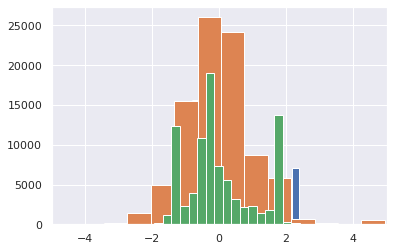

In [ ]:
# come faccio a stabile se le singole features hanno una distribuzione simile a quella normale ? p.e. plottarli !!!!!
# posso usare rapidamente ax = df.plot.hist(bins=12, alpha=0.5), ma X e' np, ho np.hist
sns.set_theme()
print(X[:,0].mean(), X[:,1].mean(), X[:,2].mean())
print(X[:,0].std(), X[:,1].std(), X[:,2].std())
plt.hist(X[:,0], bins=30)
plt.hist(X[:,1], bins=30)
plt.hist(X[:,2], bins=30)
plt.xlim(-5,5)
plt.show()
# ora ogni features e' normalizzata...

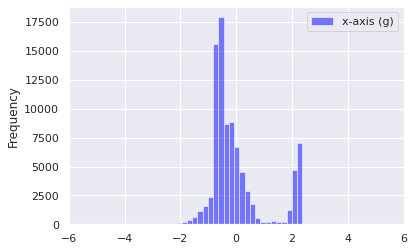

	Media x-axis (g):    -0.0
	Varianza x-axis (g):    1.0



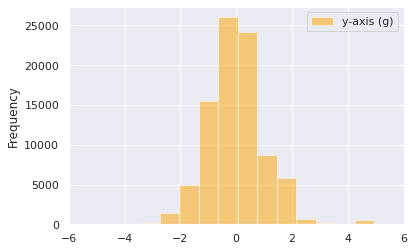

	Media y-axis (g):    -0.0
	Varianza y-axis (g):    1.0



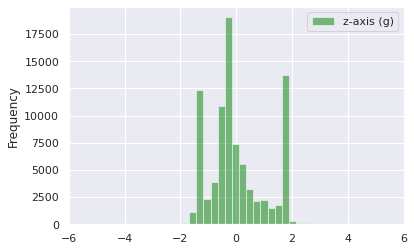

	Media z-axis (g):    0.0
	Varianza z-axis (g):    1.0



In [ ]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [6, 4] # per la displot settare hieght e aspect
plt.figure(); # set deault value, plt.rcParams must be called before this
#print(X[:,0], type(X[:,0]))
color = ['blue', 'orange', 'green']
for i in range(X.shape[1]):
  # plt.hist(X[:,i], bins=60, color=color[i] )
  # plt.legend(df.columns[i])
  # # plt.text(0.5, 0.5, '{}\n{}'.format(X[:,i].mean(),X[:,i].std()), horizontalalignment='center', verticalalignment='center',  fontsize=12)
  # plt.title("Hist plot after standardization for {}".format(df.columns[i]))
  # plt.xlim(-6,6)
  # plt.show()
  # print("\tMedia {}: ".format(df.columns[i]), " ", round(X[:,i].mean(),2))
  # print("\tVarianza {}: ".format(df.columns[i]), " ", round(X[:,i].std(),2))
  # print()

  pd.Series(data=X[:,i], name = df.columns[i]).plot.hist(bins=30, alpha=0.5, legend = True, color=color[i])
  plt.xlim(-6,6)
  plt.show()
  print("\tMedia {}: ".format(df.columns[i]), " ", round(X[:,i].mean(),2))
  print("\tVarianza {}: ".format(df.columns[i]), " ", round(X[:,i].std(),2))
  print()


### <font color="red">✪</font> 3.3 Divisione dati in insime di  addestramento & validazione (training set & test set)

>Usiamo una separazione (70/30)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [7]:
# # Scala prima di fare training una classe alla volta // no non c'e' bisogno, ogni features e' scalata per la sua media e srd dev.
# list_ds = None

# def scala_df(df):
#   scaler = StandardScaler()
#   scaler.fit(df)
#   print(scaler.scale_)
#   print(scaler.mean_)
#   print(scaler.var_)
#   return scaler.transform(df)

# x_sed_n = scala_df(sed.iloc[:, :-1])
# y_sed_n = sed.iloc[:, -1]
# print(x_sed_n)


### <font color="red">✪</font> 3.4 Train modello con **Support Vector Machine** (SVM) e valutazione delle prestazioni
>Per la ricerca del modello ottimo e ottimizzazione degli hyperparametri vedi [https://scikit-learn.org/stable/modules/grid_search.html#grid-search] per un esempio

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters SVC(kernel='rbf') 80.81%, without standardization the accuracy drop to 66.30%%, con linear ?
# svc=SVC(kernel="rbf") # sempre 80.81% ...
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
#  classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
print("SVM trainata...")

try:  beep_completed()
except:  pass



SVM trainata...


In [ ]:
# prova con linear => 66.30%
# svc=SVC(kernel="linear") #Default hyperparameters SVC(kernel='rbf') 80.81%, without standardization the accuracy drop to 66.30%%, con linear ?
# # svc=SVC(kernel="rbf") # sempre 80.81% ...
# svc.fit(X_train,y_train)
# y_pred=svc.predict(X_test)

####Matrice di Confusione
Matrice C(i,j) al cui elemento riga-i, colonna-j riporta le osservazioni del gruppo i predette come del gruppo j (p.e. elemento 2,3 => numero delle osservazioni che hanno come **ground truth** categoria In Piedi predette come Sdraiato)
>By definition a confusion matrix *C*  is such that *C(i,j)* is equal to the number of observations known to be in group *i* and predicted to be in group *j*.  



In [ ]:
#print('Accuracy Score: {0:.3f}%\n'.format(metrics.accuracy_score(y_test,y_pred)*100))
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score: {0:.2%}\n'.format(acc))

cfm = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred)
# cfm = metrics.confusion_matrix(y_true = y_test, y_pred = y_pred, labels=[0,1,2,3,4,5]) # stesso output di quello sopra !!
print(cfm)
#print("\nAccuracy: ", metrics.accuracy_score(y_test,y_pred)) # passo da 77 a 80 con la normalizzazione !!
acc = metrics.accuracy_score(y_test,y_pred)

from IPython.display import Markdown as md
s = "SVM (rbf) Accuracy Score"
md('<br><font color="red" size=5>✪</font><font size=5> **{}: </font><font color="red" size=5>{:.2%}**</font><br>'.format(s,acc))

Accuracy Score: 80.81%

[[4084    0    0    4    0    0]
 [   0 4172    0    0    0    4]
 [   0    0 4231    0    0    1]
 [ 193    7    0 3283  143  498]
 [  53    3    0  880 2085  976]
 [ 110   75   10 1548  566 3498]]


<br><font color="red" size=5>✪</font><font size=5> **SVM (rbf) Accuracy Score: </font><font color="red" size=5>80.81%**</font><br>

#### Hyperparameter tuning (si blocca su colab..ma cmq inutile per multiclass ci vuole rbf)
1. Parameter estimation using grid search with cross-validation ( https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html )  
1. Tuning the hyper-parameters of an estimator ( https://scikit-learn.org/stable/modules/grid_search.html )  
1. Cross-validation: evaluating estimator performance ( https://scikit-learn.org/stable/modules/cross_validation.html )  

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
# https://scikit-learn.org/stable/modules/svm.html 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf']},
                    {'kernel': ['linear']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.



Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'kernel': 'rbf'}

Grid scores on development set:

0.818 (+/-0.004) for {'kernel': 'rbf'}
0.630 (+/-0.013) for {'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4088
           1       0.98      1.00      0.99      4176
           2       1.00      1.00      1.00      4232
           3       0.57      0.80      0.67      4124
           4       0.75      0.52      0.61      3997
           5       0.70      0.60      0.65      5807

    accuracy                           0.81     26424
   macro avg       0.82      0.82      0.81     26424
weighted avg       0.81      0.81      0.80     26424


# Tuning hyper-parameters for rec

In [ ]:
print('X_train :', type(X_train))
print('X_test :', type(X_test))
print('y_train :', type(y_train))
print('y_test :', type(y_test))
print('y_pred :', type(y_pred))

X_train : <class 'numpy.ndarray'>
X_test : <class 'numpy.ndarray'>
y_train : <class 'pandas.core.series.Series'>
y_test : <class 'pandas.core.series.Series'>
y_pred : <class 'numpy.ndarray'>


####Plot della Confusion Matrix

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
sns.set_theme()
plt.figure()
target_names=['Seduto','Inpiedi','Sdraiato','Cammina','Scende','Sale']
plt.rcParams['figure.figsize'] = [14, 7]
# # https://matplotlib.org/stable/tutorials/colors/colormaps.html  Purples cmap=plt.cm.Greys, cmap=plt.cm.Purples, cmap=plt.cm.Blues, cmap=plt.cm.Greens, cmap=plt.cm.Oranges, cmap=plt.cm.Reds,
plot_confusion_matrix(svc, X_test, y_test, display_labels=target_names, values_format ='d', cmap=plt.cm.Purples)   # '.3g' values_format ='d' non con normalize=normalize che va con '.2%'

plt.title("HAR Confusion Matrix", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'red', \
                                           'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=10)
plt.grid(None) # !!!!!!!!!! importante senno' esce la griglia maledetta !!!! occhio va dopo il plot_confusion_matrix !!!
plt.show()  
# sns.set(font_scale=1.4) # for label size
# sns.heatmap(cfm, annot=True, annot_kws={"size": 9}) # font size
# plt.show()
# print()
# print(cfm)
# print()


print(classification_report(y_true = y_test, y_pred = y_pred, target_names=target_names))



NameError: ignored

<Figure size 720x432 with 0 Axes>

####Plot della Confusion Matrix Normalizzata

<Figure size 720x432 with 0 Axes>

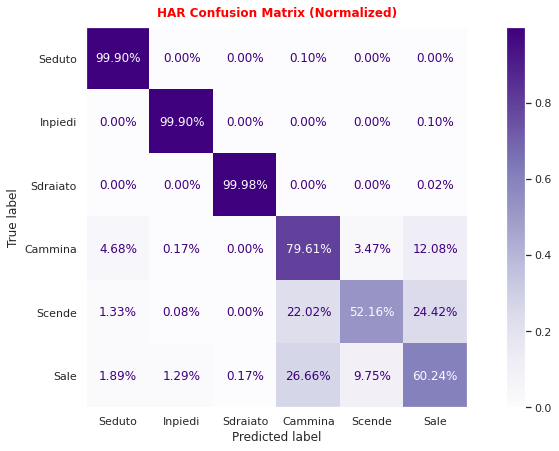

In [ ]:
# cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)  # i colori possono essere settati anche con cmap = 'blue' o cmap='RdBu_r' cmap=plt.cm.Purples,
#normalize must be one of {'true', 'pred', 'all', None}
sns.set_theme()
plt.figure()
plt.rcParams['figure.figsize'] = [14, 7]
plot_confusion_matrix(svc, X_test, y_test, display_labels=target_names, values_format ='.2%', cmap=plt.cm.Purples, normalize='true')   # '.3g' values_format ='d' non con normalize=normalize che va con '.2%'

plt.title("HAR Confusion Matrix (Normalized)", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'red', \
                                           'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=10)
plt.grid(None) # !!!!!!!!!!
plt.show() 

####Plot della Confusion Matrix con Seaborn a partire dalla tabella dei risultati
>Il plot e' molto più veloce

In [ ]:
#import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
plt.figure();
sns.set_theme()
# https://matplotlib.org/stable/tutorials/colors/colormaps.html 
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)  # i colori possono essere settati anche con cmap = 'blue' o cmap='RdBu_r'
sns.heatmap(cfm, xticklabels=target_names, yticklabels=target_names, annot=True,  linewidths=0.5, cmap=cmap, fmt='d', center=0, annot_kws={'fontsize': 12, 'fontweight' : 'bold'}, cbar=True) # fmt = 'd' !!!
plt.xlabel('Predicted label', fontdict={'fontsize': 13, 'color' : 'black'})
plt.ylabel('True label', fontdict={'fontsize': 13, 'color' : 'black'})

plt.title("HAR Confusion Matrix", fontdict={'fontsize': 12, 'fontweight' : 'bold', 'color' : 'red', \
                                           'verticalalignment': 'baseline', 'horizontalalignment': 'center'}, loc='center', pad=10)
plt.show()


NameError: ignored

<Figure size 720x432 with 0 Axes>

### <font color="red">✪</font> 3.5 Train modello con metodi **Ensemble** e valutazione delle prestazioni
L'obiettivo dei **metodi Ensemble** è combinare le previsioni di diversi stimatori di base costruiti con un dato algoritmo di apprendimento al fine di migliorare la generalizzabilità/robustezza su un singolo stimatore.

**GradientBoostingClassifier** implementa un algoritmo basato su **Gradient Tree Boosting (GTB)** o **Gradient Boosted Decision Trees (GBDT)** ovvero metodi Ensemble che usano un mix di differenti learner basati su alberi di decisione e creano delle Random Forest per selezionare i migliori alberi basati su criteri di scelta differenti.

Di solito si distinguono due famiglie di metodi di Ensemble:

**In averaging methods**, il principio guida è costruire diversi stimatori in modo indipendente e quindi fare la media delle loro previsioni. In media, lo stimatore combinato è solitamente migliore di qualsiasi stimatore a base singola perché la sua varianza è ridotta.

Esempi:   
* **Bagging methods** [ https://scikit-learn.org/stable/modules/ensemble.html#bagging ],  
* **Random Forest**  [ https://scikit-learn.org/stable/modules/ensemble.html#forest ], 

Al contrario, nei metodi **boosting**, gli stimatori di base sono costruiti in sequenza e si cerca di ridurre il bias dello stimatore combinato. La motivazione è quella di combinare diversi modelli deboli per produrre un insieme potente.

Esempi:  
* **AdaBoost** [ https://scikit-learn.org/stable/modules/ensemble.html#adaboost ] ,  
* **Gradient Tree Boosting** [ https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting ] , …



#### <font color="red">✪</font> 3.5.1 Train modello con Gradient Boosting Machine (GBM) 

**XGBoost** è un'implementazione algoritmi di apprendimento basati su alberi decisionali (Decision Tree, DT) e weak learner con gradiente potenziato (detti GBM o GBT) progettati per velocità e prestazioni, che solitamente supera le Random Forest (RF) anch'esse basate su DT.

[https://en.wikipedia.org/wiki/Gradient_boosting]  
[https://xgboost.readthedocs.io/en/latest/index.html]



#####  Iperparametri algoritmo
>Per il tuning dei parametri un interessante articolo
 [https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/] 



‎Ci sono diversi iperparametri che possiamo ottimizzare e i parametri sono diversi da learner a learner. Negli learner basati su struttura ad albero (DT decision tree), che sono i più comuni nelle applicazioni xgboost,   gli iperparametri più comunemente regolati sono i seguenti:‎

* **tasso di apprendimento (learning rate)** - regola la velocità con cui il modello si adatta all'errore residuo utilizzando learner di base aggiuntivi. Se si tratta di un tasso di apprendimento più piccolo, avrà bisogno di più cicli di apprendimento, quindi più tempo, per ottenere la stessa riduzione dell'errore residuo di uno con un tasso di apprendimento più elevato. In genere, si trova tra 0,01 e 0,3‎

‎I tre iperparametri riportati di seguito sono iperparametri di regolarizzazione.‎

* **gamma**:‎‎ regola la riduzione della perdita minima per creare una nuova divisione dell'albero. default = 0 significa nessuna regolarizzazione.‎

* **lambda‎‎**: L2 reg sui pesi delle foglie. Equivalente alla regressione di Ridge.‎

* **alfa**‎‎: L1 reg sui pesi fogliari. Equivalente alla regressione Lasso.  

* **‎max_depth**:‎‎ profondità massima per albero. Questo controlla quanto in profondità l'albero di rierca può crescere. Maggiore è la profondità, più complesso sarà il modello e maggiori possibilità di sovrafitting. I set di dati più grandi richiedono alberi profondi per apprendere le regole dai dati. Valore predefinito = 6  

* **‎sottocampione‎‎**: % campioni utilizzati per albero. Questa è la frazione del set di allenamento totale che può essere utilizzato in qualsiasi round di potenziamento. Il basso valore può portare a problemi di underfitting. Un valore molto elevato può causare problemi di sovra fitting.‎  

* **colsample_bytree**‎‎: % di feature utilizzate per albero. Questa è la frazione del numero di colonne che possiamo usare in qualsiasi arrotondamento di potenziamento. Un valore più piccolo è una regolarizzazione aggiuntiva e un valore più grande può causare problemi di overfitting.‎  

* **n_estimators**:‎‎numero di stimatori (learner di base). Questo è il numero di round di potenziamento.‎  

‎Sia in R che in Python, i learner di base predefiniti sono alberi (‎‎gbtree‎‎) ma possiamo anche ‎‎specificare **gblinear** per‎‎ i modelli lineari ‎‎e **dart**  sia per‎‎ i problemi di classificazione che di regressione.‎

Di solito si utilizza una ‎‎ **Griglia‎ di Parametri per la ricerca del risultato migliore** e si mettono a confronto le prestazioni ottenute.
Per esempio:

In [ ]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 5),
     'n_estimators':[50, 100], # lasciamo bassi il num di stimatori senò impiega troppo tempo
     'max_depth': [10, 15] # lasciamo bassi il num di max_depth senò impiega troppo tempo
}

#####**<font color="red">✪</font> Inizializzazione XGBoost**


In [37]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [38]:
# check X e y train and test already in memory
X_train, X_test, y_train, y_test

(array([[ 2.20042772,  0.7204519 ,  1.66857834],
        [ 0.04643976,  0.89739771, -0.40509087],
        [-0.29536954, -0.37661212, -0.00225888],
        ...,
        [-0.21875711, -0.25275005, -0.20367488],
        [-0.49574052, -0.18197173, -0.43255669],
        [-0.31599597, -0.58894709, -0.43713433]]),
 array([[-0.10973173, -1.20825742, -0.08923397],
        [ 0.30279674,  0.96817603, -0.56988578],
        [-0.97014826, -2.03990272,  1.39849781],
        ...,
        [-0.46332756, -0.11119341, -0.35015924],
        [-0.48395399,  0.10114157, -0.3455816 ],
        [-0.58119284, -0.46508502,  0.34106384]]),
 39745    2
 60897    4
 70628    5
 8307     0
 83168    5
         ..
 21440    1
 73349    5
 50057    3
 5192     0
 77708    5
 Name: label, Length: 61656, dtype: int64,
 42140    3
 59480    4
 76297    5
 72622    5
 75782    5
         ..
 13557    0
 34755    2
 12529    0
 3883     0
 56335    4
 Name: label, Length: 26424, dtype: int64)

E' consigliato convertire training e test sets in **DMatrix**: il tipo di dato raccomandato da utilizzare in xgboost che consente un caricamento più rapido  dei file binari;  infatti e' possibile salvare il modello dopo il training (p.e.
 `num_round = 10; 
bst = xgb.train(param, dtrain, num_round, evallist)` ) con 
`bst.save_model('0001.model') ` e ricaricato successivamente con `bst = xgb.Booster({'nthread': 4});  # init the model;
bst.load_model('model.bin')  # load the data`.


In [ ]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test =  xgb.DMatrix(data = X_test, label = y_test)

#### **Regressione GBM** (con metodo Squared Error)

Inizializzazione con parametri di default

In [ ]:
gbm = xgb.XGBRegressor(objective ='reg:squarederror')
# The answer is given in the error message. I changed Regressor model parameter: objective = 'reg:lineaqr' to 'reg:squarederror'.
# example:
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

Usiamo una Cross-Validation con 5 fold (cv =5), ovvero si divide il training set in 5 insiemi e sottopone a train e validation (test) in round in cui ciascuna volta sottopone a train 4 insiemi diversi e a validation il restante insieme, così che ogni campione ha sempre fatto parte di un insieme di train e di validation.

In [ ]:
grid_mse = GridSearchCV(estimator = gbm, param_grid = gbm_param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)

In [ ]:
grid_mse.fit(X_train, y_train)

print("Best parameters found: ",grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
pred = grid_mse.predict(X_test)

print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

from IPython.display import Markdown as md
md('<br><font color="red" size=5>✪</font><font size=5> **Root mean square error for test dataset: {}: </font><font color="red" size=5>{:.2%}**</font><br>'\
   .format(np.round(np.sqrt(mean_squared_error(y_test, pred)), 2)))

Root mean square error for test dataset: 0.59


In [ ]:
X_test

array([[-0.10973173, -1.20825742, -0.08923397],
       [ 0.30279674,  0.96817603, -0.56988578],
       [-0.97014826, -2.03990272,  1.39849781],
       ...,
       [-0.46332756, -0.11119341, -0.35015924],
       [-0.48395399,  0.10114157, -0.3455816 ],
       [-0.58119284, -0.46508502,  0.34106384]])

In [ ]:
y_test.values

array([3, 4, 5, ..., 0, 0, 4])

In [ ]:
type(y_test)

pandas.core.series.Series

###### Plot del grafico di regressione

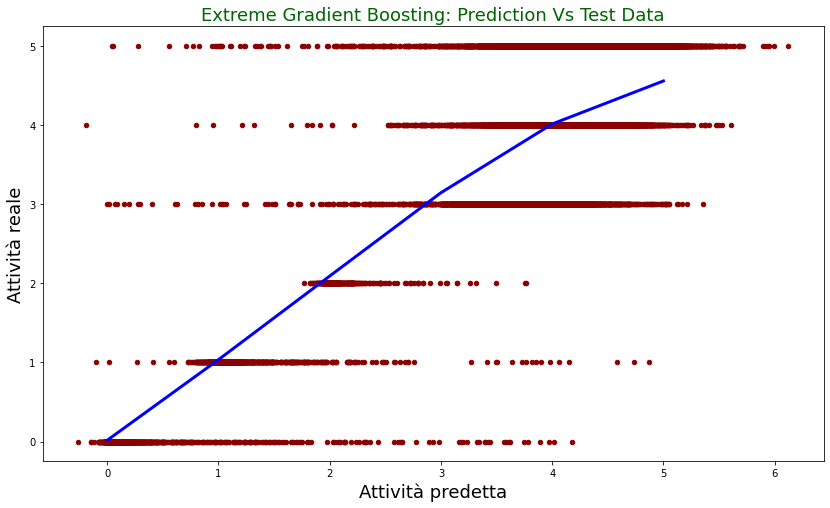

In [ ]:
test = pd.DataFrame({"prediction": pred, "observed": y_test.values})
lowess = sm.nonparametric.lowess
z = lowess(pred.flatten(), y_test.values)
test.plot(figsize = [14,8],
          x ="prediction", y = "observed", kind = "scatter", color = 'darkred')
plt.title("Extreme Gradient Boosting: Prediction Vs Test Data", fontsize = 18, color = "darkgreen")
plt.xlabel("Attività predetta", fontsize = 18) 
plt.ylabel("Attività reale", fontsize = 18)
plt.plot(z[:,0], z[:,1], color = "blue", lw= 3)
plt.show()

#### **Classificazione GBM**
>Articolo introduttivo
[https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/]



######Training modello con valori di default
> 100 estimatori  
learning_rate=0.1  
booster=gbtree  
objective='binary:logistic' (https://stats.stackexchange.com/questions/342552/what-is-the-binarylogistic-objective-function-in-xgboost )


In [39]:
gbmC = xgb.XGBClassifier()
gbmC

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
gbmC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
pred = gbmC.predict(X_test)

Per valutare le prestazioni ci sono diversi parametri che sklearn mette a disposizione [ https://scikit-learn.org/stable/modules/model_evaluation.html ]

In [42]:
from sklearn.metrics import classification_report
# X_train, X_test, y_train, y_test 
cfm = metrics.confusion_matrix(y_true = y_test, y_pred = pred, labels=np.unique(pred)) # labels=[0,1,2,3,4,5]
print(cfm)
# target_names=['Seduto','Inpiedi','Sdraiato','Cammina','Scende','Sale']
name = {0:'Seduto', 1:'Inpiedi',2:'Sdraiato',3:'Cammina',4:'Scende',5:'Sale' }
target_names = [name[_] for _ in np.unique(pred)]
print(classification_report(y_true = y_test, y_pred = pred, target_names=target_names))


[[4066    0    0    6    0   16]
 [   0 4164    0    0    0   12]
 [   0    0 4232    0    0    0]
 [  76    8    0 3087  158  795]
 [  14    1    0  801 2146 1035]
 [  49   42    9 1424  757 3526]]
              precision    recall  f1-score   support

      Seduto       0.97      0.99      0.98      4088
     Inpiedi       0.99      1.00      0.99      4176
    Sdraiato       1.00      1.00      1.00      4232
     Cammina       0.58      0.75      0.65      4124
      Scende       0.70      0.54      0.61      3997
        Sale       0.65      0.61      0.63      5807

    accuracy                           0.80     26424
   macro avg       0.81      0.81      0.81     26424
weighted avg       0.81      0.80      0.80     26424



In [112]:
score = gbmC.score(X_test, y_test)
print("gbmC.score: ", gbmC.score(X_test, y_test))
print("metrics.accuracy_score: ", metrics.accuracy_score(y_true=y_test, y_pred=pred ))

from IPython.display import Markdown as md
md('<br><font color="red" size=4>✪</font><font size=4> **GBM accuracy score su dati di training : </font><font color="red" size=4>{:.2%}**</font><br>'.format(np.round(score, 2)))


gbmC.score:  0.8030956706024825
metrics.accuracy_score:  0.8426430517711172


<br><font color="red" size=4>✪</font><font size=4> **GBM accuracy score su dati di training : </font><font color="red" size=4>80.00%**</font><br>

######**Valutazione modello su dati di test**
>Proviamo il classificatore sui dati di test per vedere la reale capacità di classificare correttamente i campioni

In [115]:
pred = gbmC.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)
bacc = metrics.balanced_accuracy_score(y_test, pred)

from IPython.display import Markdown as md
s=''
s+= '<font size =5>**Valutazione modello GBM (<font color="red">XGBClassifier</font>) su dati di test (iperparametri di default)**</font><br><br>'
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: {:.2%}** </font><br>' # 1a riga
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: {:.2%}** </font><br>'
#s += s.format(acc, bacc);
md(s.format(acc, bacc))

<font size =5>**Valutazione modello GBM (<font color="red">XGBClassifier</font>) su dati di test (iperparametri di default)**</font><br><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: 80.31%** </font><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: 81.41%** </font><br>

###### Tuning ipermarametri
E' possibile migliorare l'accuracy variando i parametri di lavoro dell'algoritmo come learnig rate, numero stimatori e profondità dell'albero di ricerca.

In [116]:
gmbAltro = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
# 14 secondi
gmbAltro.fit(X_train, y_train)
pred = gmbAltro.predict(X_test)
cfm = metrics.confusion_matrix(y_true = y_test, y_pred = pred, labels=np.unique(pred)) # labels=[0,1,2,3,4,5]
print(cfm)
# target_names=['Seduto','Inpiedi','Sdraiato','Cammina','Scende','Sale']
name = {0:'Seduto', 1:'Inpiedi',2:'Sdraiato',3:'Cammina',4:'Scende',5:'Sale' }
target_names = [name[_] for _ in np.unique(pred)]
print(classification_report(y_true = y_test, y_pred = pred, target_names=target_names))

acc = metrics.accuracy_score(y_test, pred)
bacc = metrics.balanced_accuracy_score(y_test, pred)

from IPython.display import Markdown as md
s=''
s+= '<font size =5>**Valutazione modello GBM (<font color="red">XGBClassifier</font>) su dati di test (iperparametri modificati)**</font><br><br>'
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: {:.2%}** </font><br>' # 1a riga
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: {:.2%}** </font><br>'
#s += s.format(acc, bacc);
md(s.format(acc, bacc))

[[4057    0    0   20    2    9]
 [   0 4160    0    2    0   14]
 [   0    0 4230    0    1    1]
 [  31    2    0 3330  255  506]
 [   9    0    0  557 2593  838]
 [  22   33    5 1027  760 3960]]
              precision    recall  f1-score   support

      Seduto       0.98      0.99      0.99      4088
     Inpiedi       0.99      1.00      0.99      4176
    Sdraiato       1.00      1.00      1.00      4232
     Cammina       0.67      0.81      0.74      4124
      Scende       0.72      0.65      0.68      3997
        Sale       0.74      0.68      0.71      5807

    accuracy                           0.85     26424
   macro avg       0.85      0.85      0.85     26424
weighted avg       0.85      0.85      0.84     26424



<font size =5>**Valutazione modello GBM (<font color="red">XGBClassifier</font>) su dati di test (iperparametri modificati)**</font><br><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: 84.51%** </font><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: 85.44%** </font><br>

#### <font color="red">✪</font> 3.5.2 Train modello con Gradient Tree Boosting (GTB) 
Altro metodo ensemble..**GradientBoostingClassifier (GBC)**

>Sono molto potenti  
[https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html]

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
gbmC2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=15, random_state=0).fit(X_train, y_train)
score = gbmC2.score(X_test, y_test)
# 0.831365425370875 n_estimators=150, learning_rate=0.5, max_depth=10, random_state=0
# 0.8413563427187405 n_estimators=180, learning_rate=0.3, max_depth=20, random_state=0
# 0.8388586133817741 n_estimators=200, learning_rate=0.2, max_depth=25, random_state=0
# 0.8390478353012413 n_estimators=50, learning_rate=0.4, max_depth=15, random_state=0
# 0.839199212836815. n_estimators=50, learning_rate=0.3, max_depth=15, random_state=0
# 0.8385558583106267 n_estimators=50, learning_rate=0.35, max_depth=15, random_state=0
# 0.8400317892824705 n_estimators=50, learning_rate=0.2, max_depth=15, random_state=0
# 0.8426430517711172 n_estimators=50, learning_rate=0.1, max_depth=15, random_state=0 ******** 1min 31sec. con GPU, 1:55 senza
# 0.8406372994247654 n_estimators=50, learning_rate=0.05, max_depth=15, random_state=0
# 0.8418861640932486 n_estimators=50, learning_rate=0.75, max_depth=15, random_state=0
# 0.828905540417802 n_estimators=50, learning_rate=0.9, max_depth=15, random_state=0
# 0.8424159854677565 n_estimators=100, learning_rate=0.1, max_depth=15, random_state=0 ** 2min 20 sec.
# si potrebbe fare animazione e ricerca valori ottimi..con outplut come in caret (R)..https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/ 


In [9]:
from IPython.display import Markdown as md
md('<br><font color="red" size=4>✪</font><font size=4> **GBC accuracy score su train set: </font><font color="red" size=4>{:.2%}**</font><br>'.format(np.round(score, 2)))

<br><font color="red" size=4>✪</font><font size=4> **GBC accuracy score su train set: </font><font color="red" size=4>84.00%**</font><br>

**Valutazione modello su dati di test**
>Proviamo il classificatore sui dati di test per vedere la reale capacità di classificare correttamente i campioni

In [11]:
from sklearn.metrics import classification_report
pred = gbmC2.predict(X_test)

cfm = metrics.confusion_matrix(y_true = y_test, y_pred = pred, labels=[0,1,2,3,4,5])
print(cfm)
# target_names=['Seduto','Inpiedi','Sdraiato','Cammina','Scende','Sale']
name = {0:'Seduto', 1:'Inpiedi',2:'Sdraiato',3:'Cammina',4:'Scende',5:'Sale' }
target_names = [name[_] for _ in np.unique(pred)]
print(classification_report(y_true = y_test, y_pred = pred, target_names=target_names))


acc = metrics.accuracy_score(y_test, pred)
bacc = metrics.balanced_accuracy_score(y_test, pred)
print(acc)
print(bacc)


[[4050    0    0   24    5    9]
 [   0 4158    0    1    0   17]
 [   0    0 4230    0    0    2]
 [  33    4    0 3174  285  628]
 [   8    0    0  530 2565  894]
 [  18   26    3  904  767 4089]]
              precision    recall  f1-score   support

      Seduto       0.99      0.99      0.99      4088
     Inpiedi       0.99      1.00      0.99      4176
    Sdraiato       1.00      1.00      1.00      4232
     Cammina       0.69      0.77      0.72      4124
      Scende       0.71      0.64      0.67      3997
        Sale       0.73      0.70      0.71      5807

    accuracy                           0.84     26424
   macro avg       0.85      0.85      0.85     26424
weighted avg       0.84      0.84      0.84     26424

0.8426430517711172
0.850240692258264


In [12]:
from IPython.display import Markdown as md
s=''
s+= '<font size =5>**Valutazione modello GBC (<font color="red">GradientBoostingClassifier</font>) su dati di test**</font><br><br>'
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: {:.2%}** </font><br>' # 1a riga
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: {:.2%}** </font><br>'
#s += s.format(acc, bacc);
md(s.format(acc, bacc))



<font size =5>**Valutazione modello GBC (<font color="red">GradientBoostingClassifier</font>) su dati di test**</font><br><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score: 84.26%** </font><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score: 85.02%** </font><br>

https://mljar.com/blog/feature-importance-xgboost/ 





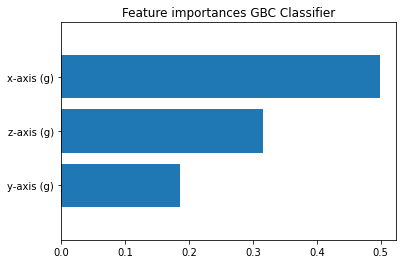

In [22]:
importances = gbmC2.feature_importances_
std = np.std([gbmC2.feature_importances_ for g in gbmC2.estimators_],
             axis=0)
indices = np.argsort(importances)
#plt.barh(boston.feature_names[sorted_idx], gbmC2.feature_importances_[sorted_idx])
# plt.barh(boston.feature_names, xgb.feature_importances_)
# plt.xlabel("Xgboost Feature Importance")
# Plot the feature importances of the gbmc2
plt.figure()
plt.title("Feature importances GBC Classifier")
plt.barh(df.columns[0:3][indices], importances[indices],  xerr=std[indices], align="center") # color='r'
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(df.columns[0:3].shape[0]), df.columns[0:3][indices])
plt.ylim([-1, X.shape[1]])
plt.show()

#oppure
# plt.figure()
# plt.title("Feature importances GBC Classifier")
# (pd.Series(importances[indices], df.columns[0:3][indices] ).plot(kind='barh')) 
# plt.show()


### <font color="red">✪</font> 3.5 Train modello con metodi **Random Forest** e valutazione delle prestazioni
> **ExtraTreesClassifier** restituisce lo stesso identico risultato di **RandomForestClassifier**, riportiamo qui solo 1 dei due metodi

0.8469951559188617
[[4050    0    0   24    5    9]
 [   0 4158    0    1    0   17]
 [   0    0 4230    0    0    2]
 [  33    4    0 3174  285  628]
 [   8    0    0  530 2565  894]
 [  18   26    3  904  767 4089]]
              precision    recall  f1-score   support

      Seduto       0.99      0.99      0.99      4088
     Inpiedi       0.99      1.00      0.99      4176
    Sdraiato       1.00      1.00      1.00      4232
     Cammina       0.69      0.77      0.72      4124
      Scende       0.71      0.64      0.67      3997
        Sale       0.73      0.70      0.71      5807

    accuracy                           0.84     26424
   macro avg       0.85      0.85      0.85     26424
weighted avg       0.84      0.84      0.84     26424

0.8426430517711172
0.850240692258264


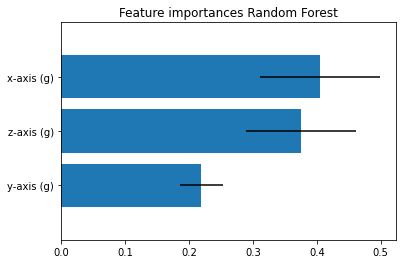

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
# stesso riusltato con from sklearn.ensemble import RandomForestClassifier..sono uguali ??
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
score = forest.score(X_test, y_test)
print(score)


cfm = metrics.confusion_matrix(y_true = y_test, y_pred = pred, labels=[0,1,2,3,4,5])
print(cfm)
# target_names=['Seduto','Inpiedi','Sdraiato','Cammina','Scende','Sale']
name = {0:'Seduto', 1:'Inpiedi',2:'Sdraiato',3:'Cammina',4:'Scende',5:'Sale' }
target_names = [name[_] for _ in np.unique(pred)]
print(classification_report(y_true = y_test, y_pred = pred, target_names=target_names))


acc = metrics.accuracy_score(y_test, pred)
bacc = metrics.balanced_accuracy_score(y_test, pred)
print(acc)
print(bacc)


importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances Random Forest")
plt.barh(df.columns[0:3][indices], importances[indices], xerr=std[indices], align="center") # color ='r'
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(df.columns[0:3].shape[0]), df.columns[0:3][indices])
plt.ylim([-1, X.shape[1]])
plt.show()



In [25]:
from IPython.display import Markdown as md
s=''
s+= '<font size =5>**Valutazione modello Random Forest (<font color="red">ExtraTreesClassifier</font>) su dati di test**</font><br><br>'
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score : {:.2%}** </font><br>' # 1a riga
s += '&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score : {:.2%}** </font><br>'
#s += s.format(acc, bacc);
md(s.format(acc, bacc))

<font size =5>**Valutazione modello Random Forest (<font color="red">ExtraTreesClassifier</font>) su dati di test**</font><br><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Accuracy Score : 84.26%** </font><br>&emsp;<font color="red" size=5>✪</font><font size=5> **Balanced Accuracy Score : 85.02%** </font><br>